<a href="https://colab.research.google.com/github/vqrca/bootcamp_alura_projeto_3/blob/main/Notebooks/Bootcamp_Projeto_3_Valquiria_Alencar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

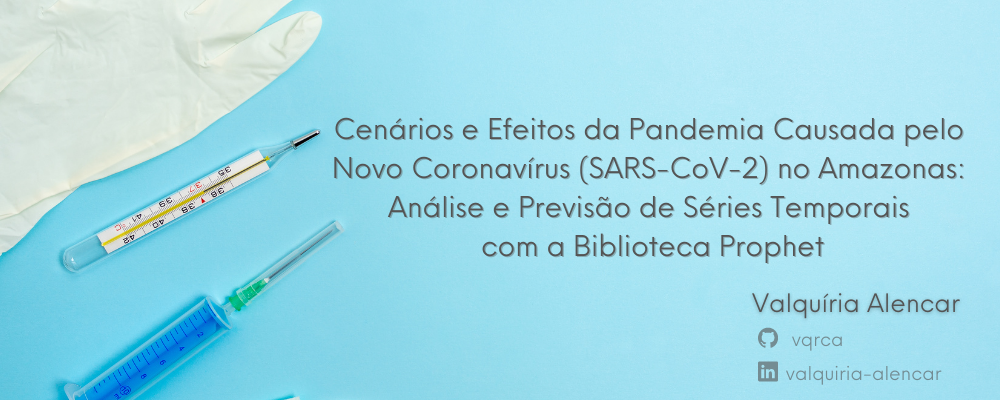

# **Introdução**

Neste projeto apliquei os conhecimentos obtidos no módulo 3 do Bootcamp de Data Science Aplicada da Alura. Todo arcabouço teórico adquirido até aqui foi aplicado para o entendimento das nuances envolvendo as séries temporais. Da estatística descritiva, passando pela análise exploratória e chegando às previsões, utilizando ferramentas específicas para esse tipo de dados, como o *StatisModel* e *Prophet* desenvolvido pelo Facebook. 

##**Contexto: Pandemia causada pelo novo coronavírus SARS-CoV-2**
Os coronavírus são um grupo diversificado de vírus que infectam diferentes animais e podem causar infecções respiratórias leves a graves em humanos. Em 2002 e 2012, respectivamente, dois coronavírus altamente patogênicos de origem zoonótica, o coronavírus com síndrome respiratória aguda grave (SARS-CoV) e o  coronavírus com síndrome respiratória do Oriente Médio (MERS-CoV), surgiram em humanos e tornam-se um novo problema de saúde pública no século XXI [[1]](https://www.nature.com/articles/s41579-018-0118-9).
No final de 2019, um novo coronavírus designado como SARS-CoV-2 surgiu na cidade de Wuhan, na China, e causou um surto de pneumonia viral incomum. Por ser altamente transmissível, essa nova doença conhecida como COVID-19, se espalhou rapidamente por todo o mundo. Superou de forma esmagadora o SARS e o MERS em termos de número de pessoas infectadas e da amplitude espacial das áreas epidêmicas. O surto contínuo de COVID-19 representa uma ameaça extraordinária à saúde pública global [[2]](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext). 

Por ser uma doença altamente contagiosa, a vida em praticamente todo o planeta foi  modificada. Os grandes centros urbanos se transformaram: ruas vazias, o home office se tornou realidade da vida da maioria das pessoas, aulas também se tornaram online e  diversas atividades foram suspensas. O objetivo dessas medidas sempre foi diminuir a transmissão do vírus, na tentativa de achatar a curva de contágio e não permitir um crescimento exponencial desenfreado no número de casos, e consequentemente, no número de óbitos.
A experiência da China mostrou que intervenções não farmacológicas, que incluem diversas formas de distanciamento social, desde o isolamento de casos e contatos, até o bloqueio total (*lockdown*), poderiam conter a epidemia [[4]](https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200304-sitrep-44-covid-19.pdf?sfvrsn=783b4c9d_2). 

<p align="center"><img src='https://media.giphy.com/media/Qu1fT51CG14ksIkASL/giphy.gif'</p>

Todas essas ações foram cruciais até que vacinas fossem desenvolvidas, testadas e finalmente, aplicadas na população. 

##**Cenário da Pandemia no Brasil**

- No final de fevereiro de 2020, o primeiro caso da doença foi confirmado no Brasil [[5]](https://www.scielosp.org/article/ress/2020.v29n4/e2020376/#). 

- Em 20 de março de 2020, o país decretou transmissão comunitária em todo o território nacional [[5]](https://www.scielosp.org/article/ress/2020.v29n4/e2020376/#). 

- Em maio de 2020, a Covid-19 tornou-se a maior causa de morte no Brasil [[5]](https://www.scielosp.org/article/ress/2020.v29n4/e2020376/#).

- Até a semana epidemiológica 20 a região Norte apresentou as maiores taxas de incidência e mortalidade [[5]](https://www.scielosp.org/article/ress/2020.v29n4/e2020376/#). 

- Até a semana epidemiológica 20 o Amazonas apresentou a maior taxa de incidência. 
[[5]](https://www.scielosp.org/article/ress/2020.v29n4/e2020376/#). 

- Em 8 de agosto, menos de seis meses depois, o Brasil chegou à triste marca de 100.000 mortes causadas pelo novo coronavírus [[6]](https://brasil.elpais.com/ciencia/2020-07-23/evolucao-dos-casos-de-coronavirus-no-brasil.html).

- Em 7 de janeiro de 2021, os óbitos chegaram à marca de 200.000 [[6]](https://brasil.elpais.com/ciencia/2020-07-23/evolucao-dos-casos-de-coronavirus-no-brasil.html).

- No início de março de 2021, o país registrou sua semana mais letal desde o início da pandemia, com a média móvel de mortes em torno de 1.500 por dia [[6]](https://brasil.elpais.com/ciencia/2020-07-23/evolucao-dos-casos-de-coronavirus-no-brasil.html).

- Em abril de 2021 a média móvel de mortes por Covid passou de 3.000 e o Brasil registrou 3.673 óbitos em 24 horas. A média móvel bateu recorde pelo 7º dia seguido[[7]](https://www1.folha.uol.com.br/equilibrioesaude/2021/04/media-movel-de-mortes-passa-de-3000-e-brasil-registra-3673-obitos-em-24-h.shtml#:~:text=M%C3%A9dia%20m%C3%B3vel%20de%20mortes%20por,2021%20%2D%20Equil%C3%ADbrio%20e%20Sa%C3%BAde%20%2D%20Folha). 

- Recentemente, o Brasil ultrapassou meio milhão de óbitos por SARS-CoV-2 e o número de casos acumulados reportados ultrapassou 17 milhões [[8]](https://covid.saude.gov.br/).

##**O caso de Amazonas**

No meu [projeto 1: Análise dos Gastos Hospitalares do SUS (Sistema Único de Saúde) e Evolução das Taxas de Mortalidade no Brasil](https://github.com/vqrca/bootcamp_alura_projeto_1), desenvolvido anteriormente nesse Bootcamp, eu realizei análises sobre a evolução das taxas de mortalidade Brasil. Essas análises mostraram que a taxa de mortalidade dobrou em Amazonas em 2021 (apresentando uma taxa de mortalidade de 10.82), quando comparado a 2020 (5.46), consequentemente se tornando o Estado com maior taxa de mortalidade.

O gráfico abaixo foi obtido com os dados dessas análises anteriores:
> O dataset utilizado foi obtido no [Tabnet](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def) em junho de 2021, e nesse período os dados disponíveis eram de 2007 a março de 2021.

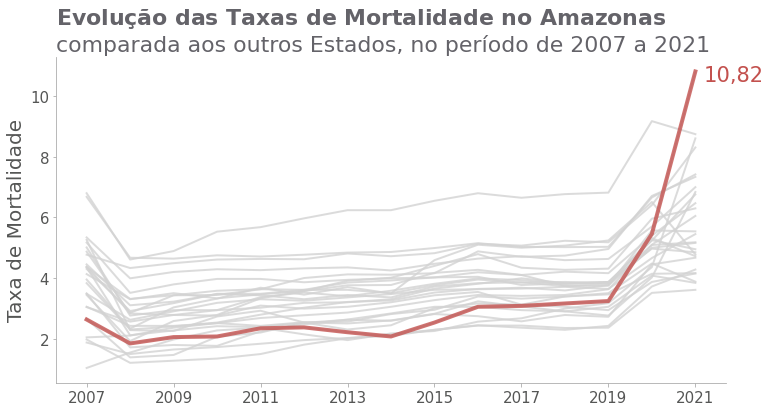

Além disso: 

- O estado do Amazonas, que apresentou as maiores taxas de incidência e de mortalidade por COVID-19, reportou colapso no sistema de saúde e crise no sistema funerário [[9]]( https://saude.estadao.com.br/noticias/geral,amazonas-apresenta-colapso-no-sistema-de-saude-por-causa-do-coronavirus,70003272136). 
- Em janeiro de 2021, o Amazonas começou a viver um colapso com a segunda onda, com a falta de oxigênio nos hospitais de Manaus [[6]](https://brasil.elpais.com/ciencia/2020-07-23/evolucao-dos-casos-de-coronavirus-no-brasil.html).


**Por esses motivos, esse projeto teve o foco em analisar a capital do Amazonas: Manaus!**


> Uma publicação sumarizando as análises, sem conter os códigos, pode ser encontrada na minha página do [Medium](https://medium.com/p/fefbc0d385cc).

# **Dados**

## **Coleta dos dados:**

Os dados utilizados neste projeto foram obtidos do [Brasil.io](https://brasil.io/dataset/covid19/caso_full/), um banco de dados que disponibiliza dados acerca dos casos e óbitos de SARS-CoV-2 no Brasil todo.
Eu escolhi o dataset: caso_full, que possui os dados para todos os municípios do país. 

> API: https://brasil.io/api/dataset/covid19/caso_full/data

> Dados completos para download: https://data.brasil.io/dataset/covid19/caso_full.csv.gz

O arquivo *.csv* desse dataset foi salvo no dia 18/06/21 e pode ser encontrado no [Google Drive](https://drive.google.com/drive/folders/1skKBY8LjHj0tL7vk_nZfAQuZ-2G0cDZz).




#**A Estrutura do notebook é a seguinte:**

🐍 [Importação das Bibliotecas](#bibliotecas)

▶️[Funções e Listas](#func)

🎲 [Importação dos Dados](#imp1)

🔍 [Análise Exploratória](#exp1)

✅[Tratamento da Bases de Dados](#trat1)

📉 [Análises dos Dados](#results1)
  - [Análises Preliminares](#pre)
  - [Previsão de Novos Casos, causados pelo SARS-CoV-2, em Manaus](#casos)
  - [Previsão de Novos Óbitos, causados pelo SARS-CoV-2, em Manaus](#obitos)

💡 [Conclusões](#conc)

🚀[Considerações finais](#final)

📄[Referências](#ref)

📚[Documentação](#doc)

👏[Agradecimentos](#agra)


<a name="bibliotecas"></a>
#**Importando as bibliotecas**

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import ccf
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error 
from sklearn.metrics import r2_score 
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Configurações do gráficos**

In [2]:
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)


#Configuração das cores utilizadas nos gráficos: 
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
PURPLE1 = 'darkorchid'

<a name="func"></a>
#**Funções**

In [3]:
#Função para verificar dados nulos:
def dados_nulos(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe

    Source: https://towardsdatascience.com/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [4]:
#Função para plotar gráficos em linhas
def plot_line(x, y, dados, title='', subtitle='', xlabel='', ylabel='', color=''):
    
    fig, ax = plt.subplots(figsize = (12, 6))
    plt.sca(ax)
    sns.lineplot(x=x, y=y, data=dados, linewidth = 2, color=color)
    plt.ylabel(ylabel, fontdict = {'fontsize': 20}, color = GRAY3)
    plt.xlabel(xlabel, fontdict = {'fontsize': 20}, color = GRAY3)
    plt.title(title + '\n',  loc = 'left', fontsize = 25, color = GRAY4)
    plt.text(0,1.03, subtitle, color=GRAY5, transform=ax.transAxes, fontsize=20)
    ax.tick_params(color = 'darkgrey', bottom = 'off')
    ax.spines['bottom'].set_color('darkgrey')
    ax.spines['left'].set_color('darkgrey')
    ax.spines['right'].set_color('darkgrey')
    ax.spines['top'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for i in ax.get_yticklabels() + ax.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)
    for i in ax.get_yticklabels() + ax.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)
    plt.show()

In [5]:
#Função para plotar casos x óbitos:
def plot_cases_deaths():
  fig, axes = plt.subplots(figsize = (12, 6))

  plt.title('$\\bf{Casos\ Diários\ vs.\ Óbitos\ Diários\ em\ Manaus}$\nDados de março de 2020 a junho de 2021',
          loc = 'left', fontsize = 25, color = GRAY4)
  ax1 = sns.lineplot(x = 'date', y = 'new_confirmed', data = dados_manaus, linewidth = 2, color=BLUE4)
  axes.set_xlabel('Período (Ano/Mês)', fontdict = {'fontsize': 20}, color = GRAY3)
  axes.set_ylabel('Número de Casos', fontdict = {'fontsize': 20}, color = GRAY3)
  ax2 = ax1.twinx()
  ax2 = sns.lineplot(x = 'date', y = 'new_deaths', data = dados_manaus,  color=RED1, linewidth = 2)
  ax2.set_ylabel('Número de Óbitos', fontdict = {'fontsize': 20}, color = GRAY3)

  axes.tick_params(color = 'darkgrey', bottom = 'off')
  axes.spines['bottom'].set_color('darkgrey')
  axes.spines['left'].set_color('darkgrey')
  axes.spines['right'].set_color('darkgrey')
  axes.spines['top'].set_visible(False)
  ax2.spines['top'].set_visible(False)

  for i in axes.get_yticklabels() + axes.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY3)
  for i in ax2.get_yticklabels() + ax2.get_xticklabels():
    i.set_fontsize(15)
    i.set_color(GRAY3)

  plt.show()

In [6]:
def obitos_sp_manaus( ): 

  fig, axes = plt.subplots(figsize = (12, 6))

  plt.title('$\\bf{Óbitos\ Diários\ em\ São\ Paulo\ vs.\ Óbitos\ Diários\ em\ Manaus}$\nDados de março de 2020 a junho de 2021',
          loc = 'left', fontsize = 20, color = GRAY4)
  ax1 = sns.lineplot(x = 'date', y = 'new_deaths', data = dados_sp, linewidth = 2, color=GRAY8)
  axes.set_xlabel('Período (Ano/Mês)', fontdict = {'fontsize': 20}, color = GRAY3)
  axes.set_ylabel('Número de Óbitos', fontdict = {'fontsize': 20}, color = GRAY3)
  ax2 = ax1.twinx()
  ax2 = sns.lineplot(x = 'date', y = 'new_deaths', data = dados_manaus,  color=RED1, linewidth = 2)
  ax2.set_ylabel('Número de Óbitos', fontdict = {'fontsize': 20}, color = GRAY3)

  axes.tick_params(color = 'darkgrey', bottom = 'off')
  axes.spines['bottom'].set_color('darkgrey')
  axes.spines['left'].set_color('darkgrey')
  axes.spines['right'].set_color('darkgrey')
  axes.spines['top'].set_visible(False)
  ax2.spines['top'].set_visible(False)

  for i in axes.get_yticklabels() + axes.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)
  for i in ax2.get_yticklabels() + ax2.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)

  plt.show()

In [7]:
#Função para plotar média móvel de casos:
def media_movel_casos(dados, title='', subtitle=''):
    
    fig, ax = plt.subplots(figsize = (14, 6))
    plt.sca(ax)
    ax.bar(dados['date'], dados['new_confirmed'], color=BLUE4)
    ax.plot(dados['date'], dados['media_movel_casos'], color=BLUE1, linewidth = 2)
    ax.set_xlabel('Período (Ano/Mês)', fontdict = {'fontsize': 20}, color = GRAY3)
    ax.set_ylabel('Número de Casos', fontdict = {'fontsize': 20}, color = GRAY3)
    plt.title(title + '\n',  loc = 'left', fontsize = 25, color = GRAY4)
    plt.text(0,1.03, subtitle, color=GRAY5, transform=ax.transAxes, fontsize=20)
    ax.tick_params(color = 'darkgrey', bottom = 'off')
    ax.spines['bottom'].set_color('darkgrey')
    ax.spines['left'].set_color('darkgrey')
    ax.spines['right'].set_color('darkgrey')
    ax.spines['top'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for i in ax.get_yticklabels() + ax.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)
    for i in ax.get_yticklabels() + ax.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)
    plt.show()

In [8]:
#Função para plotar média móvel de óbitos:
def media_movel_obitos(dados, title='', subtitle=''):
    
    fig, ax = plt.subplots(figsize = (14, 6))
    plt.sca(ax)
    ax.bar(dados['date'], dados['new_deaths'], color=RED2)
    ax.plot(dados['date'], dados['media_movel_obitos'], color=RED1, linewidth = 2)
    ax.set_xlabel('Período (Ano/Mês)', fontdict = {'fontsize': 20}, color = GRAY3)
    ax.set_ylabel('Número de Óbitos', fontdict = {'fontsize': 20}, color = GRAY3)
    plt.title(title + '\n',  loc = 'left', fontsize = 25, color = GRAY4)
    plt.text(0,1.03, subtitle, color=GRAY5, transform=ax.transAxes, fontsize=20)
    ax.tick_params(color = 'darkgrey', bottom = 'off')
    ax.spines['bottom'].set_color('darkgrey')
    ax.spines['left'].set_color('darkgrey')
    ax.spines['right'].set_color('darkgrey')
    ax.spines['top'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for i in ax.get_yticklabels() + ax.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)
    for i in ax.get_yticklabels() + ax.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)
    plt.show()

In [9]:
#Função para plotar crosscorrelation: 

def plot_cross_correlation(dados, title='', subtitle='', xlabel='', ylabel='', color=''):
    
    fig, ax = plt.subplots(figsize = (12, 6))
    plt.sca(ax)
    x_lag = range(0,len(dados))
    plt.plot(x_lag, ccf_output, color=color,  linewidth = 3)
    plt.ylim(-1,1)
    plt.ylabel(ylabel, fontdict = {'fontsize': 20}, color = GRAY3)
    plt.xlabel(xlabel, fontdict = {'fontsize': 20}, color = GRAY3)
    plt.title(title + '\n',  loc = 'left', fontsize = 20, color = GRAY4)
    plt.text(0,1.03, subtitle, color=GRAY5, transform=ax.transAxes, fontsize=20)
    ax.tick_params(color = 'darkgrey', bottom = 'off')
    ax.spines['bottom'].set_color('darkgrey')
    ax.spines['left'].set_color('darkgrey')
    ax.spines['right'].set_color('darkgrey')
    ax.spines['top'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for i in ax.get_yticklabels() + ax.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)
    for i in ax.get_yticklabels() + ax.get_xticklabels():
      i.set_fontsize(15)
      i.set_color(GRAY3)

    plt.show()

In [10]:
#Função para plotar gráficos de previsões:
def plot_previsao(title='', xlabel='', ylabel=''):
    
    modelo.plot(previsao, figsize=(12,6));
    plt.title(title, loc = 'left', fontsize = 25, color = GRAY4)
    plt.xticks(fontsize=16, rotation=360, color=GRAY3)
    plt.yticks(fontsize=16, color=GRAY3)
    plt.xlabel(xlabel, fontsize=20, color=GRAY3)
    plt.ylabel(ylabel, fontsize=20, color=GRAY3)
    plt.show()

In [11]:
#Função para plotar gráficos de previsão com treino e teste:
def plot_previsao_teste(title='', xlabel='', ylabel=''):
    
    modelo.plot(previsao, figsize=(12,6));
    plt.plot(df_teste['ds'], df_teste['y'], '.r') 
    plt.title(title, loc = 'left', fontsize = 25, color = GRAY4)
    plt.xticks(fontsize=16, rotation=360, color=GRAY3)
    plt.yticks(fontsize=16, color=GRAY3)
    plt.xlabel(xlabel, fontsize=20, color=GRAY3)
    plt.ylabel(ylabel, fontsize=20, color=GRAY3)
    plt.show()

In [12]:
#Função para plotar gráficos de previsão com changepoints:
def plot_previsao_changepoints(title='', xlabel='', ylabel=''):
    
    fig = modelo.plot(previsao, figsize=(12,6));
    a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
    plt.title(title, loc = 'left', fontsize = 25, color = GRAY4)
    plt.xticks(fontsize=16, rotation=360, color=GRAY3)
    plt.yticks(fontsize=16, color=GRAY3)
    plt.xlabel(xlabel, fontsize=20, color=GRAY3)
    plt.ylabel(ylabel, fontsize=20, color=GRAY3)
    plt.show()

<a name="lista"></a>
#**Listas**

In [13]:
#Lista de feriados nacionais e feriados específicos do município de Manaus

feriados_ma_2020 = [
'2020-04-10', #Paixão de Cristo
'2020-04-10', #Domingo de Páscoa
'2020-04-21', #Tiradentes
'2020-05-01', #Dia Mundial do Trabalho
'2020-05-07', #Aniversário do amazonas (feriado estadual)
'2020-09-07', #Independência do Brasil
'2020-10-24', #Aniversário de Manaus (feriado municipal)
'2020-10-12', #Nossa Senhora Aparecida
'2020-11-20', #Dia da Consciência Negra Feriado (feriado municipal em Manaus)
'2020-11-02', #Finados
'2020-11-15', #15 de novembro (domingo): Proclamação da República
'2020-12-08', #Dia de Nossa Senhora da Conceição, padroeira de Manaus e do Amazonas
'2020-12-25' #Natal
]

feriados_ma_2021 = [
'2021-01-01', #Ano Novo
'2021-02-15', #Carnaval
'2021-02-16', #Carnaval
'2021-02-17', #Carnaval(quarta de cinzas)
'2021-04-02', #Sexta-Feira Santa
'2021-04-21', #Tiradentes
'2021-05-01', #Dia Mundial do Trabalho
'2021-06-03' #Corpus Christi
]

<a name="imp1"></a>
#**Importando os dados**:

Os dados estão disponíveis no [Google Drive](https://drive.google.com/drive/folders/1skKBY8LjHj0tL7vk_nZfAQuZ-2G0cDZz?usp=sharing).

In [14]:
dados = pd.read_csv('/content/drive/MyDrive/bootcamp_projeto_3/caso_full.csv.gz')
               
dados.head()

city  city_ibge_code        date  ...  state  new_confirmed  new_deaths
0  Rio Branco       1200401.0  2020-03-17  ...     AC              3           0
1         NaN            12.0  2020-03-17  ...     AC              3           0
2  Rio Branco       1200401.0  2020-03-18  ...     AC              0           0
3         NaN            12.0  2020-03-18  ...     AC              0           0
4  Rio Branco       1200401.0  2020-03-19  ...     AC              1           0

[5 rows x 18 columns]

##**Estrutura dos dados**

As informações sobre o conteúdo de todas as colunas foram obtidas no [repositório do GitHub](https://github.com/turicas/covid19-br/blob/master/api.md#caso_full) do Brasil.IO: 

🔍 `city`: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).

🔍 `city_ibge_code`: código IBGE do local.

🔍 `date`: data de coleta dos dados no formato YYYY-MM-DD.

🔍 `epidemiological_week`: número da semana epidemiológica no formato YYYYWW.

🔍`estimated_population`: população estimada para esse município/estado em 2020, segundo o IBGE.

🔍`estimated_population_2019`: população estimada para esse município/estado em 2019, segundo o IBGE. Porém, essa coluna possui valores desatualizados. O ideal é usar a coluna estimated_population.

🔍 `is_last`: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False.

🔍 `is_repeated`: campo pré-computado que diz se as informações nesse registro foram publicadas pela Secretaria Estadual de Saúde no dia date ou se o dado é repetido do último dia em que o dado está disponível (igual ou anterior a date).Isso ocorre pois nem todas as secretarias publicam boletins todos os dias. 

🔍`last_available_confirmed`: número de casos confirmados do último dia disponível igual ou anterior à data date.

🔍`last_available_confirmed_per_100k_inhabitants`: número de casos confirmados por 100.000 habitantes (baseado em estimated_population) do último dia disponível igual ou anterior à data date.

🔍 `last_available_date`: data da qual o dado se refere.

🔍`last_available_death_rate`: taxa de mortalidade (mortes / confirmados) do último dia disponível igual ou anterior à data date.

🔍`last_available_deaths`: número de mortes do último dia disponível igual ou anterior à data date.

🔍 `order_for_place`: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.

🔍 `place_type`: tipo de local que esse registro descreve, pode ser city ou state.

🔍 `state`: sigla da unidade federativa, exemplo: SP.

🔍`new_confirmed`: número de novos casos confirmados desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).

🔍`new_deaths`: número de novos óbitos desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).

<a name="exp1"></a>
# **Análise exploratória dos dados**

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264320 entries, 0 to 2264319
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

O Dataset possui 2264320 registros e 18 variáveis. 


In [ ]:
#Checando se temos dados nulos em alguma das variáveis:
dados_nulos(dados)

Number of NA  Percent NA
last_available_confirmed_per_100k_inhabitants         23788        1.05
city                                                  12478        0.55
city_ibge_code                                         8269        0.37
estimated_population                                   8269        0.37
estimated_population_2019                              8269        0.37

Neste projeto serão utilizados as colunas `state`, `city`, `new_confirmed` e `new_deaths`. 
Como a quantidade de dados nulos em `city` corresponde apenas à 0.55% isso não terá impacto nas análises. 

<a name="trat1"></a>
#**Tratamento das bases de dados**

In [15]:
#formatando os dados da coluna 'date':
dados['date'] = pd.to_datetime(dados['date'], format='%Y-%m-%d')

<a name="results1"></a>
#**Análise dos dados**

<a name="pre"></a>
##**Análises preliminares**

**Média do número de casos notificados diariamente em todo o país:**

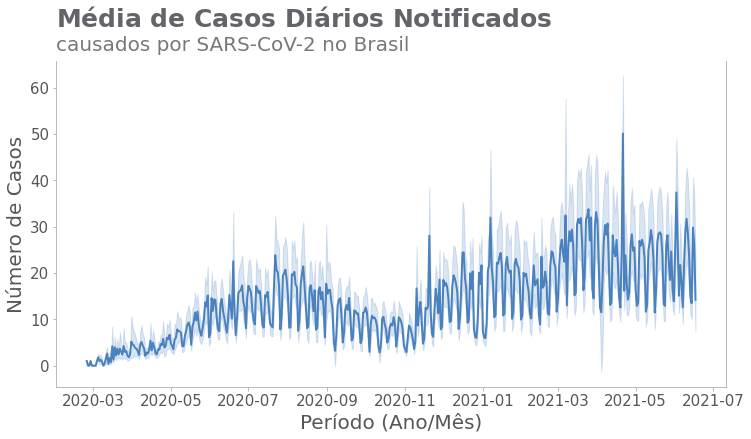

In [ ]:
plot_line('date', 'new_confirmed', dados, '$\\bf{Média\ de\ Casos\ Diários\ Notificados}$', 'causados por SARS-CoV-2 no Brasil',
            'Período (Ano/Mês)', 'Número de Casos', BLUE2)

A linha azul mais forte é a média para todas as Unidades da Federação e a faixa azul mais clara representa o intervalo de confiança. Vemos que **os casos diários notificados aumentaram em 2021**, **principalmente após março**. Nesse período, o Brasil bateu recordes nos casos de Covid-19 e média de mortes [[10]](https://www.cnnbrasil.com.br/saude/2021/03/17/covid-19-no-brasil-17-3-2021).
Em 17 de março de 2021 o país registrou mais 90.303 casos de Covid-19 em 24 horas, sendo o  maior aumento diário desde o início da pandemia. O número máximo até então havia sido registrado em 7 de janeiro de 2021, quando 87.843 novos casos foram notificados. Nesse período os números alarmantes refletiram na situação dos hospitais em todo o país. Apenas dois dos 26 estados tinham menos de 80% de ocupação dos leitos de UTI e, em alguns deles, já não havia mais nenhuma vaga disponível na rede pública.


**Média do número de óbitos notificados diariamente em todo o país:**

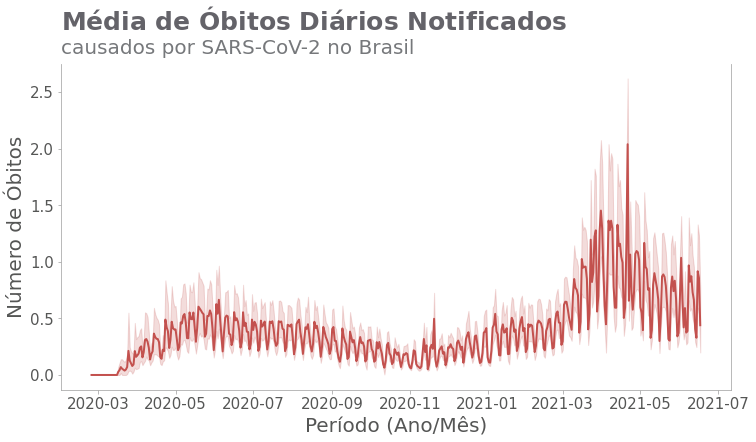

In [ ]:
plot_line('date', 'new_deaths', dados, '$\\bf{Média\ de\ Óbitos\ Diários\ Notificados}$', 'causados por SARS-CoV-2 no Brasil',
            'Período (Ano/Mês)', 'Número de Óbitos', RED1)

A linha vermelha mais forte é a média de novos óbitos diários para todas as Unidades da Federação. A faixa vermelha mais clara representa o intervalo de confiança.
Podemos observar que **o número de novos óbitos diários teve um aumento relevante após março de 2021**. 
Segundo o boletim extraordinário de 25 de junho de 2021 [[11]](https://portal.fiocruz.br/sites/portal.fiocruz.br/files/documentos/boletim_covid_2021_extraordinario_junho_parte1.pdf), do Observatório Covid-19 (Fiocruz), **em 2021 o Brasil atingiu novas 100 mil mortes em menos de 3 meses**, chegando a 300 mil mortes desde o início da pandemia. Desde então, foi notada uma **aceleração**: **em pouco menos de três meses o Brasil atingiu a marca dos 500 mil óbitos** (em junho de 2021). Esse resultado foi o pior dentro do grupo de países com maiores populações, apresentando um **indicador que chega a ser cerca de cinco vezes mais alto que a taxa global**.

###**Analisando somente o Amazonas**

**Como o foco desse projeto é analisar e fazer previsões sobre Amazonas, vou fazer um `query` para obter os dados somente desse estado:**

In [ ]:
dados_am = dados.query('state == "AM"')

**Média do número de casos notificados diariamente no Amazonas:**

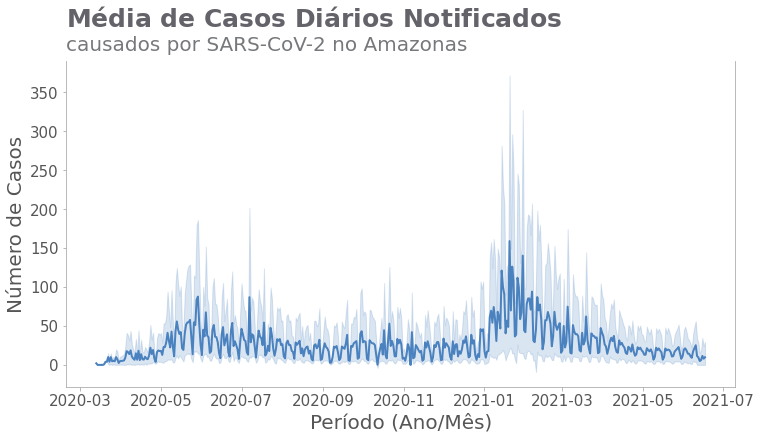

In [ ]:
plot_line('date', 'new_confirmed', dados_am, '$\\bf{Média\ de\ Casos\ Diários\ Notificados}$', 'causados por SARS-CoV-2 no Amazonas',
            'Período (Ano/Mês)', 'Número de Casos', BLUE2)

A linha azul é a média para todos os municípios do Amazonas e a faixa mais clara representa o intervalo de confiança. 

O estado do **Amazonas notificou o primeiro caso confirmado de SARS-CoV-2 em Manaus, capital do estado, em março de 2020**, em um viajante que retornou da Europa [[12]](https://www.scielo.br/j/mioc/a/zZcPQFjhhgYrJLVJ77HJC3C/?lang=en). No final de fevereiro de 2021 mais de 306.000 casos foram confirmados e mais de 10.400 mortes foram notificadas no Amazonas [[13]](https://www.fvs.am.gov.br/media/publicacao/21_02_21_BOLETIM_DIÁRIO_DE_CASOS_COVID-19.pdf). De acordo com esse gráfico: **A epidemia de COVID-19 no Amazonas é, até o momento, caracterizada por duas curvas de casos de crescimento exponencial**. Corroborando com esses resultados mostrados aqui, os dados epidemiológicos da vigilância de doenças respiratórias agudas graves (SARI) e enterros indicam que a **primeira onda da epidemia começou em março de 2020 e atingiu o pico por volta do início de maio de 2020**, quando o número de casos diminuiu e então permaneceu praticamente estável de junho a novembro de 2020. Porém, **em meados de dezembro o número de casos começou a crescer exponencialmente, configurando a segunda onda da epidemia** [[14]](https://www.nature.com/articles/s41591-021-01378-7).

Além disso, Manaus passou por uma situação deplorável no início de 2021, pois houve [falta de cilindros de oxigênio medicinal](https://agenciabrasil.ebc.com.br/saude/noticia/2021-01/mp-vai-investigar-mortes-por-falta-de-oxigenio-no-amazonas), usados em pacientes internados com COVID-19, em hospitais públicos e privados do Amazonas.

**Média do número de óbitos notificados diariamente no Amazonas:**

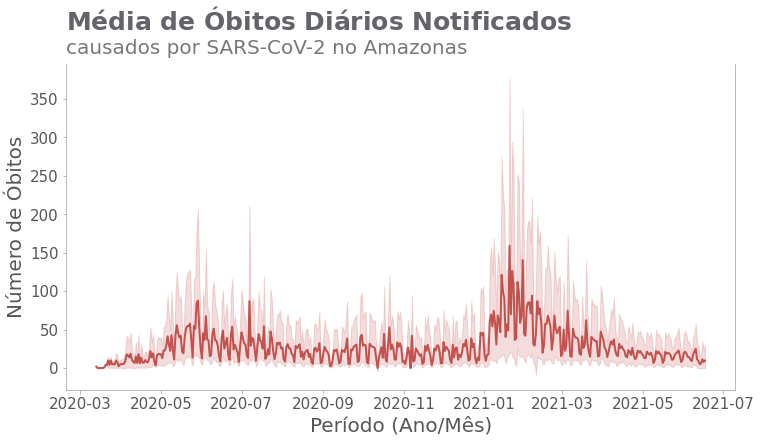

In [ ]:
plot_line('date', 'new_confirmed', dados_am, '$\\bf{Média\ de\ Óbitos\ Diários\ Notificados}$', 'causados por SARS-CoV-2 no Amazonas',
            'Período (Ano/Mês)', 'Número de Óbitos', RED1)

A linha vermelha é a média para todos os municípios do Amazonas e a faixa mais clara representa o intervalo de confiança. 

Assim como no gráfico anterior, os óbitos também tiveram a **primeira onda se iniciando em março de 2020, que atingiu o pico por volta do início de maio de 2020**, quando o número de óbitos diminuiu e então permaneceu praticamente estável de junho a novembro de 2020. Porém, **em meados de dezembro o número de óbitos começou a crescer exponencialmente, configurando a segunda onda da pandemia**.

Em artigo publicado em maio de 2021 na revista científica Nature Medicine [[14]](https://www.nature.com/articles/s41591-021-01378-7), pesquisadores da Fiocruz e de instituições parceiras apontaram as causas do crescimento do número de casos de **Covid-19 no Amazonas** e das sucessivas substituições de linhagens do SARS-CoV-2. Esse estudo indicou que o **aumento de casos e óbitos foram impulsionados por uma combinação de diminuições das medidas de distanciamento social e pelo surgimento de uma forma mais transmissível do vírus, a variante P.1**, identificada em meados de novembro de 2020. **Essa variante causou um aumento exponencial da doença, o que estabeleceu a segunda onda da epidemia no estado**.

###**Manaus**

Manaus é a capital do estado Amazonas e o município mais populoso do Estado. Segundo a última estimativa, apresentada neste dataset na coluna `estimated_population`, possui 2.219.580 de habitantes.

No ínicio de 2021, Manaus passou por um [colapso no sistema de saúde](https://g1.globo.com/am/amazonas/noticia/2021/01/14/covid-19-manaus-vive-colapso-com-hospitais-sem-oxigenio-doentes-levados-a-outros-estados-cemiterios-sem-vagas-e-toque-de-recolher.ghtml) , devido ao alto número de casos e óbitos causados pelo SARS-CoV-2. Com internações batendo recordes, unidades de saúde ficaram sem oxigênio e o estado chegou ao ponto de enviar pacientes para outros estados.

Por isso, as próximas análises e previsões serão focadas em Manaus.

**Novo `query` para obter os dados somente de Manaus:**

In [16]:
dados_manaus = dados.query('city == "Manaus"')

**Número de casos notificados diariamente em Manaus:**

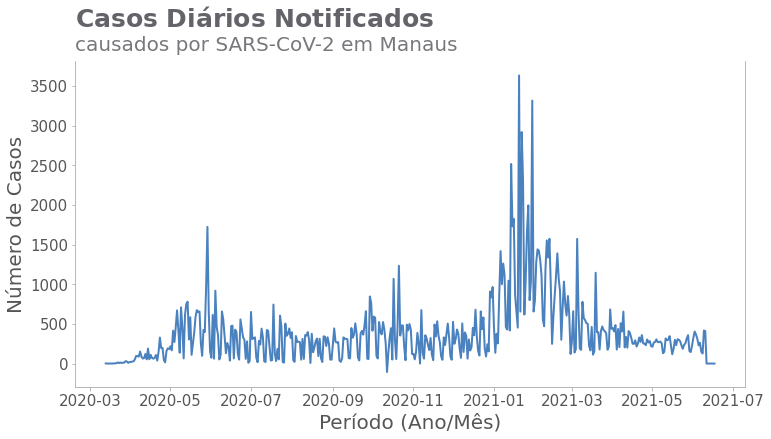

In [ ]:
plot_line('date', 'new_confirmed', dados_manaus, '$\\bf{Casos\ Diários\ Notificados}$', 'causados por SARS-CoV-2 em Manaus',
            'Período (Ano/Mês)', 'Número de Casos', BLUE2)

Nesse gráfico vemos as duas ondas da Pandemia em Manaus. **Na segunda onda temos casos diários ultrapassando 3 mil notificações**. 
A **variante P.1** e também conhecida como N501Y.V3, **surgiu em Manaus**, sendo detectada pela primeira vez em quatro viajantes que retornavam do estado do Amazonas ao Japão em 2 de janeiro de 2021 [[15]](https://wwwnc.cdc.gov/eid/article/27/4/21-0138_article) e logo foi reconhecida como uma variante emergente em Manaus. Essa variante possui 21 mutações, incluindo dez mutações na proteína *Spike* (L18F, T20N, P26S, D138Y, R190S, K417T, E484K, N501Y, H655Y e T1027I). O surgimento da variante P.1 foi apontado como **uma das possíveis causas da segunda onda de COVID-19 em Manaus**. No entanto, a relação precisa entre as variantes circulantes do SARS-CoV-2 e a dinâmica da epidemia no Amazonas permanece obscura devido à escassez de sequências virais amostradas neste estado brasileiro antes de dezembro de 2020 [[14]](https://www.nature.com/articles/s41591-021-01378-7).

**Número de casos vs Número de óbitos - notificados diariamente em Manaus:**

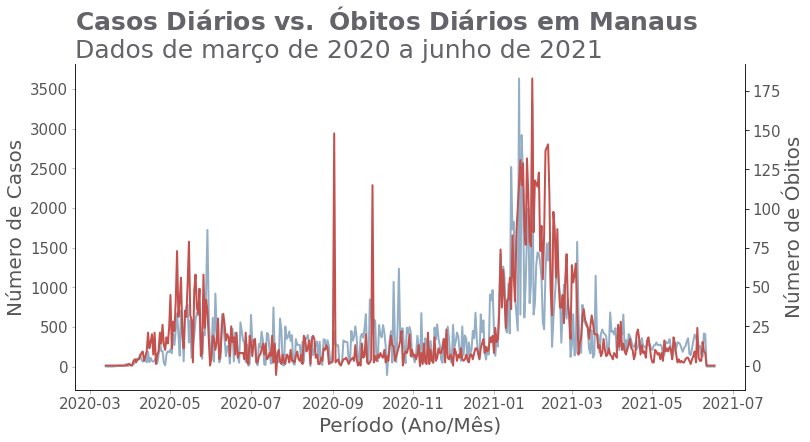

In [ ]:
plot_cases_deaths()

Quando comparamos os casos (*em azul*) e óbitos diários (*em vermelho*), vemos que os dados não se alinham totalmente, pois em casos graves, após a pessoa ser contaminada pode levar alguns dias até que o óbito aconteça.
Além disso, vemos que assim como os casos, **os óbitos possuem duas ondas bem evidentes e há dois picos altos em setembro e outubro de 2020**.
Após verificar informações a respeito encontrei duas matérias do G1 sobre a reclassificação de óbitos por covid, que correspondem com esses picos.
Essa reclassificação ocorreu, pois óbitos que ocorreram entre meses de abril e maio haviam sido registrados como SRAG de causa não especificada. 
Provavelmente, esses óbitos reclassificados foram incluídos nas datas:  2020-09-02 e 2020-10-01. 

Fonte:

[Matéria de Setembro](https://g1.globo.com/am/amazonas/noticia/2020/09/02/mais-de-200-mortes-ocorridas-em-manaus-no-pico-da-pandemia-sao-reclassificadas-para-covid-19.ghtml)

[Matéria de Outubro](https://g1.globo.com/am/amazonas/noticia/2020/10/01/mais-de-300-mortes-ocorridas-no-pico-da-pandemia-em-manaus-sao-reclassificadas-para-covid-19.ghtml)

###**Comparação entre os municípios São Paulo e Manaus**

Só para entendermos o impacto dos óbitos em Manaus, vou fazer uma comparação dos óbitos diários entre Manaus e o município de São Paulo. 
Lembrando que a população de São Paulo é de ~12 milhões de habitantes.
Além disso, vamos se os picos de óbitos ocorreram em períodos distintos:

In [ ]:
dados_sp = dados.query('city == "São Paulo"')

In [ ]:
dados_sp['new_deaths'].max() #número máximo de óbitos notificados em SP

378

In [ ]:
dados_manaus['new_deaths'].max() #número máximo de óbitos notificados em AM

183

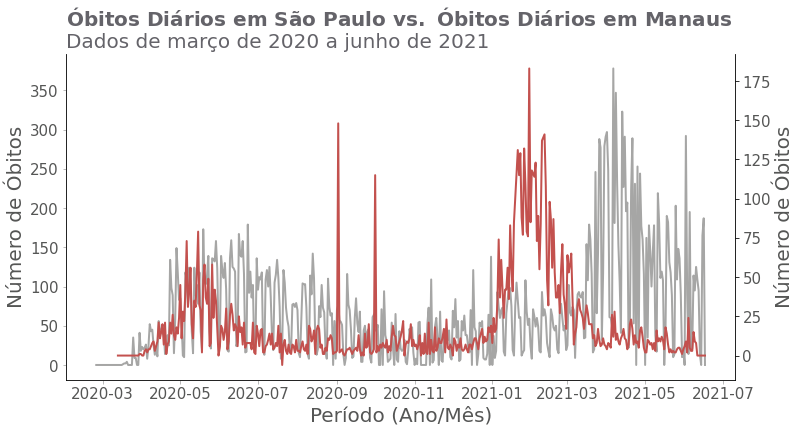

In [ ]:
obitos_sp_manaus()

Em vermelho temos os dados de óbitos de Manaus e em cinza estão os óbitos do município de São Paulo. Mesmo tendo populações com tamanhos extremamente diferentes (cerca de 5,5 vezes maior em São Paulo), na segunda onda da Pandemia, Manaus teve um valor máximo de 178 óbitos diários e São Paulo teve um valor máximo de 378 óbitos. Além disso, podemos observar que **a segunda onda da Pandemia chegou primeiro em Manaus e em São Paulo ela começou após março de 2021**, provavelmente devido ao surgimento da variante P.1 em Manaus [[14]](https://www.nature.com/articles/s41591-021-01378-7).


###**Análise da média móvel para casos e óbitos diários em Manaus**

A média móvel nos permite analisar se o número de casos confirmados e o número de óbitos causados pela COVID-19 na última semana tem aumentado ou diminuído, de acordo com o mesmo intervalo de tempo das semanas anteriores. Ou seja, a média móvel é calculada somando-se o número de casos ou óbitos de cada um dos sete dias anteriores e dividindo esse resultado por 7 (que é o número de dias considerado)

**Análise da média móvel de casos novos e óbitos novos:**

In [ ]:
dados_manaus['media_movel_casos'] = dados_manaus['new_confirmed'].rolling(window=7, center=False).mean()
dados_manaus['media_movel_obitos'] = dados_manaus['new_deaths'].rolling(window=7, center=False).mean()

**Média móvel de Casos Novos**

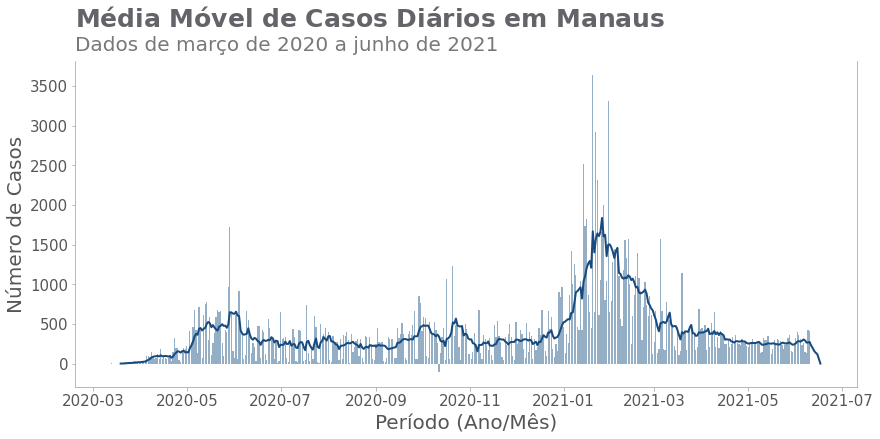

In [ ]:
media_movel_casos(dados_manaus, '$\\bf{Média\ Móvel\ de\ Casos\ Diários\ em\ Manaus}$', 'Dados de março de 2020 a junho de 2021')

Neste gráfico vemos uma queda da média móvel de casos após abril de 2021 e uma estabilização. 

**Média móvel de Óbitos Novos**

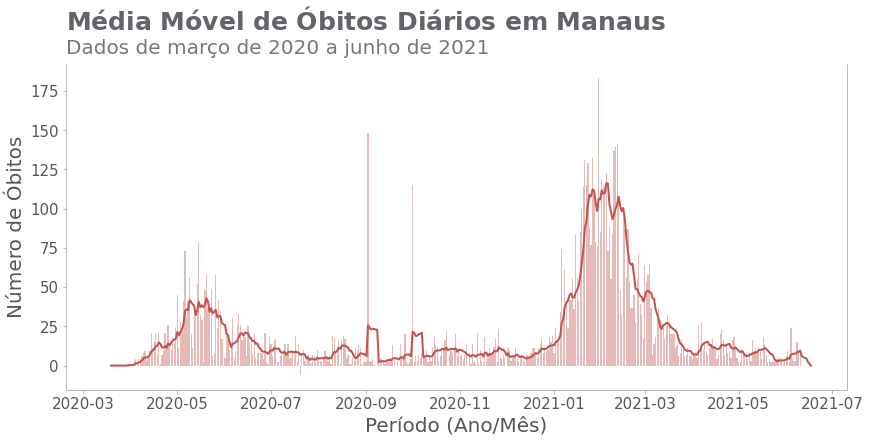

In [ ]:
media_movel_obitos(dados_manaus, '$\\bf{Média\ Móvel\ de\ Óbitos\ Diários\ em\ Manaus}$', 'Dados de março de 2020 a junho de 2021')

Neste gráfico vemos uma queda da média móvel de casos após abril de 2021 e uma estabilização. 

É importante ressaltar que não são os óbitos ocorridos na semana que necessariamente entram na contabilização, mas aqueles registrados no sistema durante a semana.

**A vacinação contra a COVID-19 se iniciou em 17 de janeiro de 2021 no Brasil** [[16]](https://agenciabrasil.ebc.com.br/saude/noticia/2021-01/vacinacao-contra-covid-19-come%C3%A7a-em-todo-o-pais). **Em maio de 2021, mais de 250 mil pessoas já estavam com o ciclo de imunização completo em Manaus**. **Até o final de maio Manaus ultrapassou a meta de 90% estabelecida pelo Ministério da Saúde em dez grupos**: povos indígenas (92%); trabalhadores de saúde (105%), pessoas de 60 a 64 anos (90,3%); pessoas de 65 a 69% (93,8%); grupo de 70 a 74 anos (94,5%); de 75 a 79 anos (93,2%); idosos de 80 anos e mais (97,1%); e pessoas de 18 a 59 anos com comorbidades(130,5%).[[17]](https://semsa.manaus.am.gov.br/noticia/mais-de-250-mil-pessoas-ja-estao-com-o-ciclo-de-imunizacao-completo-em-manaus/). **Isso explica a média móvel baixa e estabilizada tanto para casos e óbitos, após a segunda onda, o que certamente, deve ser reflexo da vacinação.**

###**Taxa de crescimento de novos casos e óbitos em Manaus**

Fazendo a diferenciação se obtém o coeficiente angular: a taxa de crescimento, se há aumento ou diminuição. 
O método diff() é usado para calcular a diferença discreta entre os dados: 

In [ ]:
#Taxa de crescimento de casos:
dados_manaus['taxa_de_crescimento_casos'] = dados_manaus['new_confirmed'].diff()


In [ ]:
#Taxa de crescimento de óbitos:
dados_manaus['taxa_de_crescimento_obitos'] = dados_manaus['new_deaths'].diff()

**Taxa de Crescimento de Novos Casos**

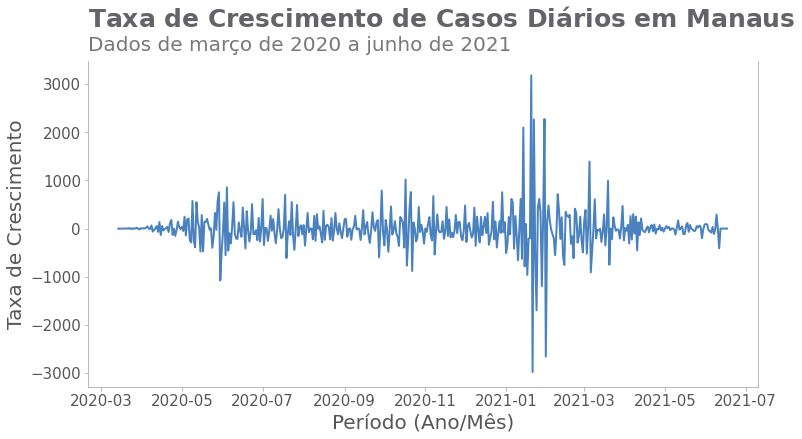

In [ ]:
plot_line('date', 'taxa_de_crescimento_casos', dados_manaus, '$\\bf{Taxa\ de\ Crescimento\ de\ Casos\ Diários\ em\ Manaus}$', 
          'Dados de março de 2020 a junho de 2021', 'Período (Ano/Mês)', 'Taxa de Crescimento', BLUE2)

Nesse gráfico há uma **alta taxa de crescimento**, na **segunda onda** da Pandemia, entre janeiro 2021 - fevereiro 2021. **A taxa de crescimento foi caindo aos poucos, até diminuir bastante em meados de maio de 2021.** 

**Taxa de Crescimento de Novos Óbitos**

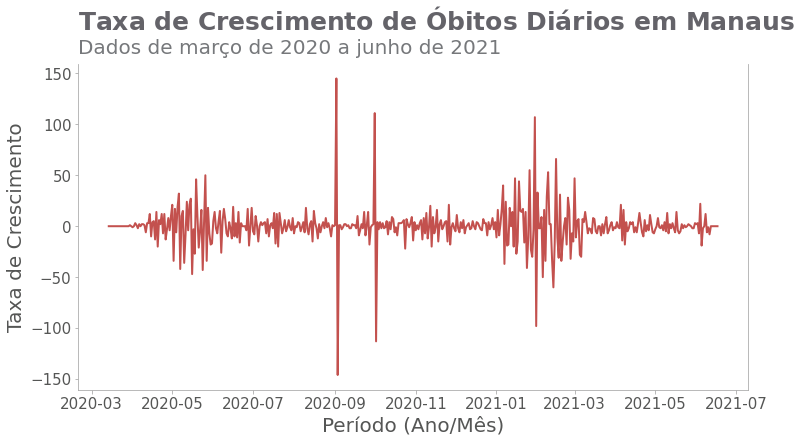

In [ ]:
plot_line('date', 'taxa_de_crescimento_obitos', dados_manaus, '$\\bf{Taxa\ de\ Crescimento\ de\ Óbitos\ Diários\ em\ Manaus}$', 
          'Dados de março de 2020 a junho de 2021', 'Período (Ano/Mês)', 'Taxa de Crescimento', RED1)

Nesse gráfico há uma **maior taxa de crescimento, na segunda onda da Pandemia**, entre janeiro de 2021 a março de 2021. **A taxa de crescimento foi caindo, até diminuir bastante em meados de maio de 2021**. 
Temos dois picos altos de taxa de crescimento em setembro e outubro, mas já esclareci anteriormente que pode ser devido uma reclassificação de óbitos, que devem ter sido incluídos nas datas: 2020-09-02 e 2020-10-01.



###**Análise de correlação**

Vamos analisar se os casos e óbitos estão correlacionados:

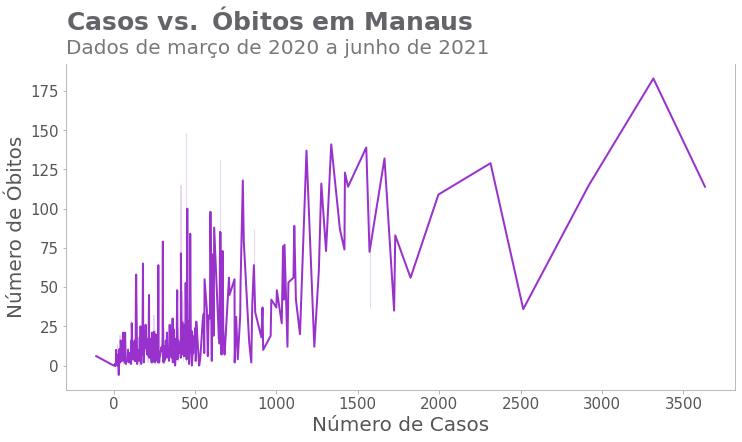

In [ ]:
plot_line('new_confirmed', 'new_deaths', dados_manaus, '$\\bf{Casos\ vs.\ Óbitos\ em\ Manaus}$', 
          'Dados de março de 2020 a junho de 2021', 'Número de Casos', 'Número de Óbitos', PURPLE1)

Quando plotamos os Casos no eixo `X` e os Óbitos no eixo `Y`, vemos que eles não estão tão correlacionados.

> *O nosso pensamento, provavelmente, seria: Quanto maior o número de Casos, maior o número de Óbitos.*

Vou analisar esses dados de uma maneira mais adequada utilizado a correlação cruzada:

A correlação cruzada (*Cross-Correlation*) é uma medida que rastreia os movimentos de dois ou mais conjuntos de dados de uma série temporal em relação um ao outro. É usada para comparar várias séries temporais e determinar objetivamente o quão bem elas combinam entre si e, em particular, em que ponto ocorre a melhor correspondência.
Vamos ver como os dados que temos se comportam:

Correlação cruzada entre casos e óbitos, utilizando o `StatsModels`:

In [ ]:
ccf_output = (ccf(dados_manaus['new_confirmed'], dados_manaus['new_deaths'], unbiased=True))
ccf_output

array([ 6.98112352e-01,  6.45823279e-01,  5.78803457e-01,  5.41368926e-01,
        5.16788852e-01,  4.85095190e-01,  5.12302320e-01,  5.86007319e-01,
        5.67036306e-01,  5.15037988e-01,  4.50714542e-01,  4.16955112e-01,
        4.14022024e-01,  4.01708756e-01,  4.91007255e-01,  4.36198005e-01,
        3.85143023e-01,  3.52134372e-01,  3.14760255e-01,  2.86586475e-01,
        3.29220633e-01,  3.43322617e-01,  3.27638775e-01,  2.84398967e-01,
        2.54593410e-01,  1.90651863e-01,  1.73437210e-01,  2.21349857e-01,
        2.41605197e-01,  1.92317163e-01,  1.35743531e-01,  1.27393826e-01,
        8.03651364e-02,  6.20960045e-02,  1.25115003e-01,  1.17224169e-01,
        7.50456991e-02,  5.98953062e-02,  3.89829918e-02, -6.32337297e-03,
       -1.99023427e-02, -2.48271979e-04,  3.79617494e-02,  2.79747225e-02,
       -2.92528185e-02, -1.56520174e-02, -5.35600837e-02, -6.27267940e-02,
       -2.47116973e-02,  1.00446747e-02, -4.98657076e-02, -6.82437401e-02,
       -8.70222579e-02, -

Visualização gráfica da *Cross-Correlation*:

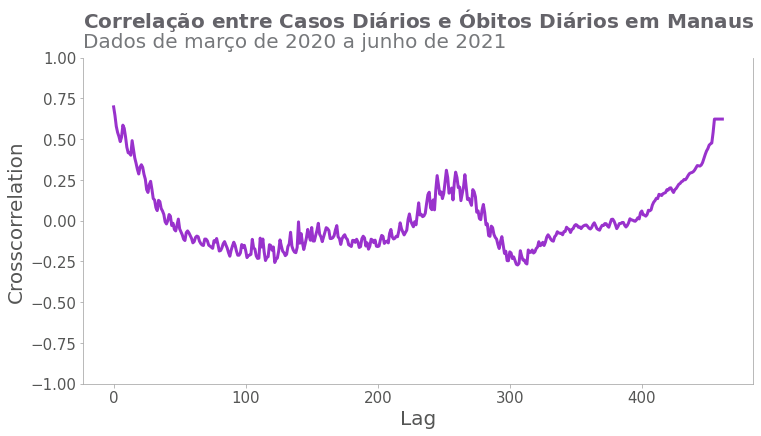

In [ ]:
plot_cross_correlation(dados_manaus, '$\\bf{Correlação\ entre\ Casos\ Diários\ e\ Óbitos\ Diários\ em\ Manaus}$', 
          'Dados de março de 2020 a junho de 2021', 'Lag', 'Crosscorrelation', PURPLE1)

Esse gráfico da *Cross-correlation* mostra que **na maioria dos dados há uma baixa correlação, já que a maioria está abaixo de 0.25**.
Isso deve ser reflexo do fato de que **os óbitos não acontecem nos mesmos dias em que os casos são notificados**. Além disso, é importante lembrar novamente que não são os óbitos ocorridos na semana que necessariamente entram na contabilização, mas aqueles registrados no sistema durante a semana. Então, dificilmente, haveria uma correlação alta entre esses dados. 

##**Previsões com Prophet**


A biblioteca Prophet é usada para criar modelos onde a série é ajustada considerando características não estacionárias, como tendência e sazonalidade.

O modelo ajustado pelo Prophet é do tipo:


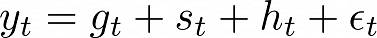

Neste caso, a série usa o termo **g** para modelar a tendência, o **s** para as mudanças periódicas e o **h** para efeitos específicos, como: feriados. A tendência pode ser modelada como uma equação de reta. Já, a parte sazonal, utiliza série de Fourier:


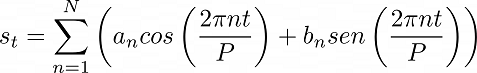

Nesse caso P é igual a 365,25 no caso de sazonalidade anual. As séries de Fourier são uma combinação de funções seno e cosseno, que  conseguem modelar os efeitos sazonais com períodos e fases diferentes.

**Definindo os dados que irão para previsão:**

Quando usamos o Prophet, precisamos definir **ds** e **y**: 

- **ds**: é a coluna dos dados que contém as **datas**

- **y**: é a coluna com os **dados que vamos querer prever**. No caso desse projeto será a coluna 'new_confirmed' para prever novos casos e a coluna 'new_deaths' para novos óbitos.




<a name="casos"></a>
##**Previsão de Novos Casos, causados pelo SARS-CoV-2, em Manaus**

A primeira etapa é selecionar quais dados serão `ds` e `y`. 

Como eu quero prever novos casos, a coluna `new_confirmed`será o `y` e coluna `date` será o `ds`: 

In [17]:
df = pd.DataFrame()
df['ds'] =dados_manaus['date']
df['y'] = dados_manaus['new_confirmed']
df

ds  y
52329 2020-03-13  2
52331 2020-03-14  0
52333 2020-03-15  0
52335 2020-03-16  0
52337 2020-03-17  0
...          ... ..
78842 2021-06-13  0
78905 2021-06-14  0
78968 2021-06-15  0
79031 2021-06-16  0
79094 2021-06-17  0

[462 rows x 2 columns]

Primeira previsão:

In [18]:
modelo = Prophet()
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=30) #periods é o número de dias da previsão. Deixei 30 dias só como análise preliminar
previsao = modelo.predict(dataFramefuture)
previsao.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-03-13  134.847732  ...                         0.0  242.038304
1 2020-03-14  135.974636  ...                         0.0  200.020337
2 2020-03-15  137.101540  ...                         0.0  -49.445044
3 2020-03-16  138.228444  ...                         0.0  -74.491335
4 2020-03-17  139.355348  ...                         0.0  190.305511

[5 rows x 16 columns]

O yhat é a nossa estimativa! Agora vamos plotar a previsão:

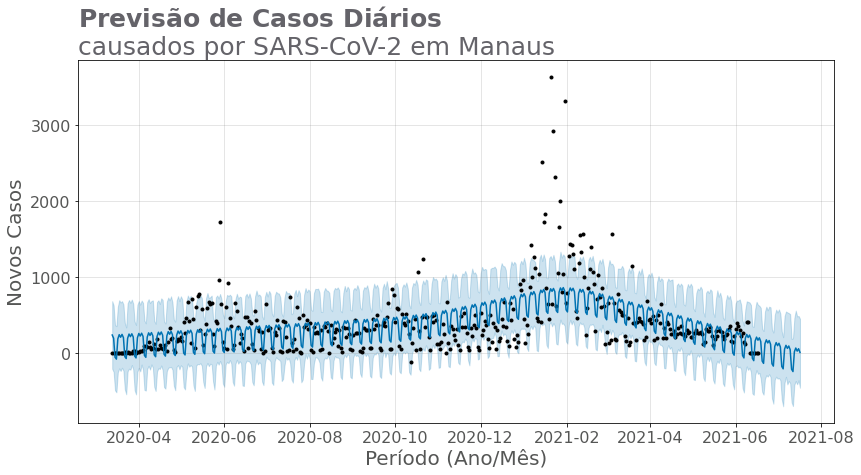

In [19]:
plot_previsao('$\\bf{Previsão\ de\ Casos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Casos')

Esses pontos em preto são os nossos dados reais. O modelo ajustado é a curva em azul escuro e temos valores para frente, que foram previstos para 30 dias. Há uma região azul mais clara que é o nosso intervalo de confiança. **Alguns pontos estão fora do intervalo de confiança e isso significa que o modelo só ajustou a maioria dos dados.**

####**Previsão com dados separados em treino e teste**

Para saber se essa previsão é boa: basta dividir os dados em treino e teste!

Geralmente quando separamos os dados em treino e teste, usamos 70% para treino e o restante para teste.
Porém, no meu caso como temos aquele pico enorme, da segunda onda da Pandemia em Manaus, optei por usar mais que 70% dos dados para treino. Portanto, os 400 dados iniciais foram treinados.

In [20]:
df = pd.DataFrame()

Separando os dados de treino

In [21]:
df['ds'] = dados_manaus['date'][:400]
df['y'] = dados_manaus['new_confirmed'][:400]

Separando os dados de teste:

In [22]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_manaus['date'][400:]
df_teste['y'] = dados_manaus['new_confirmed'][400:]

Treinando o modelo e fazendo a previsão:

In [23]:
modelo = Prophet()
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=62)
previsao = modelo.predict(dataFramefuture)
previsao.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-03-13  141.163572  ...                         0.0  257.090936
1 2020-03-14  142.253658  ...                         0.0  223.821275
2 2020-03-15  143.343744  ...                         0.0  -63.194262
3 2020-03-16  144.433830  ...                         0.0  -92.162358
4 2020-03-17  145.523915  ...                         0.0  203.336407

[5 rows x 16 columns]

Gráfico da previsão, com os dados de treino e teste:

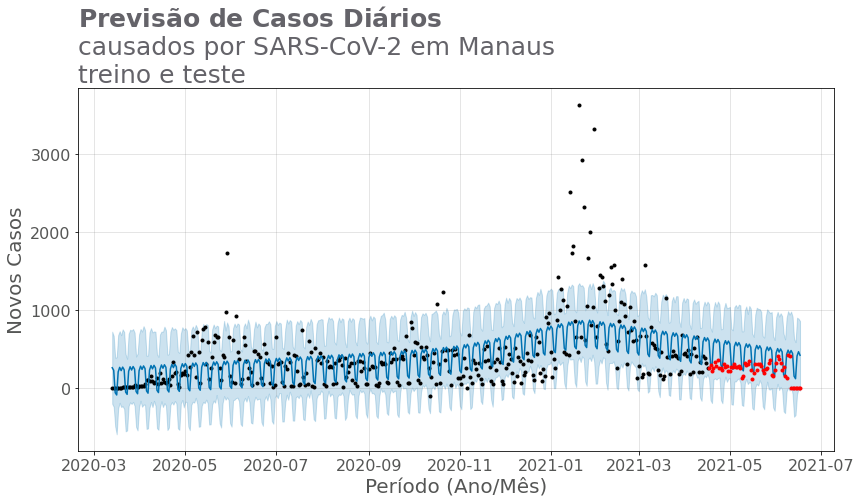

In [24]:
plot_previsao_teste('$\\bf{Previsão\ de\ Casos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus\ntreino e teste', 'Período (Ano/Mês)', 'Novos Casos')

A divisão entre treino e teste é de extrema importância, para saber se o modelo está bom. Vemos que a maioria do pontos vermelhos (do teste) estão próximos ao ajuste. Porém, mais ajustes precisam ser realizados, pois os pontos precisam estar mais aderentes à curva.

Análise da tendência e de como os dados se comportam semanalmente:

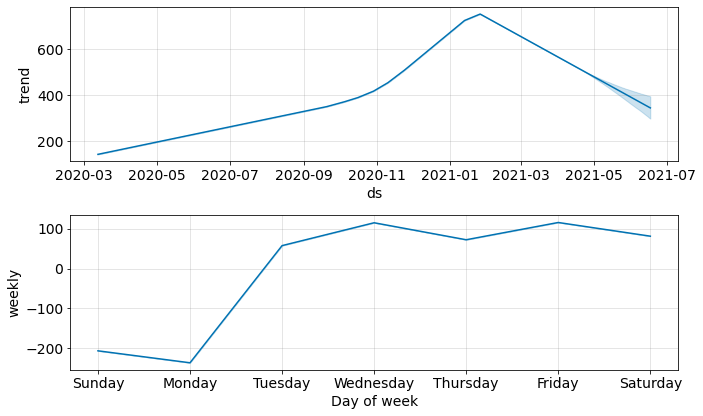

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));


O primeiro gráfico representa a tendência ao longo do tempo. Essa tendência indica que os casos notificados começaram a cair em fevereiro de 2021.

O segundo gráfico representa a sazonalidade semanal, mostrando que nos **domingos e segundas há uma diminuição da notificação dos casos.**

**Os dados da Pandemia aos domingos, segundas e feriados, costumam ser menores devido a atrasos de notificação nas secretarias da saúde, que nesses dias, trabalham com menos profissionais, em esquema de plantão.**

###**Adicionando os Changepoints ao modelo:**

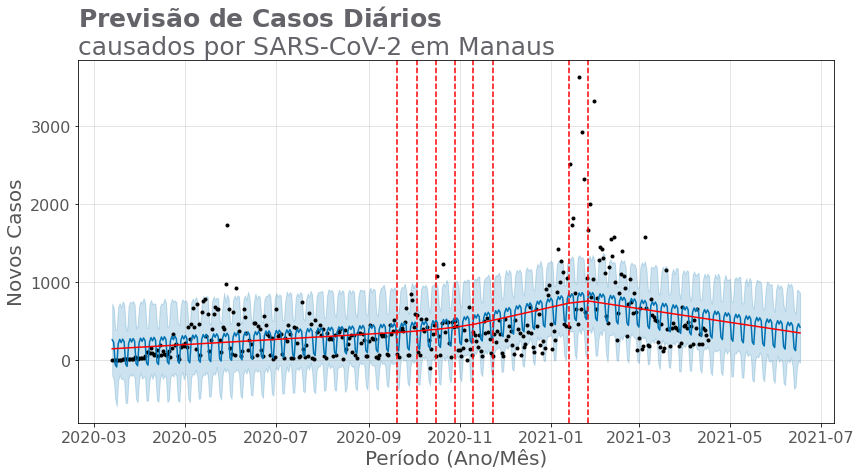

In [25]:
plot_previsao_changepoints('$\\bf{Previsão\ de\ Casos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Casos')

A curva está se ajustando melhor aos pontos dessa forma, porém após fevereiro temos alguns problemas de ajuste.

**Novo modelo adicionando `n_changepoints` e aumentando o range default para `changepoint_range=0.90`:**

In [26]:
modelo = Prophet(n_changepoints=25, changepoint_range=0.90)
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=62)
previsao = modelo.predict(dataFramefuture)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão com *changepoints* modificados: 

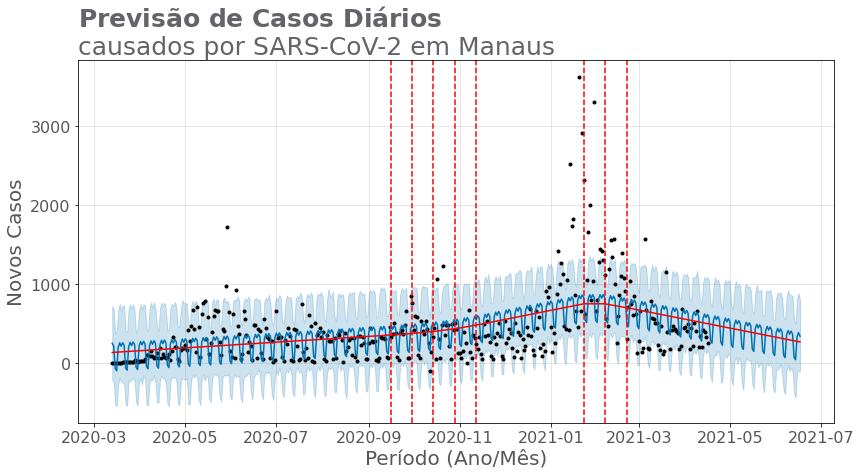

In [27]:
plot_previsao_changepoints('$\\bf{Previsão\ de\ Casos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Casos')

**Aumentando a flexibilidade dos `changepoints `, com `changepoint_prior_scale=0.1`:**

In [28]:
modelo = Prophet(n_changepoints=25, changepoint_range=0.90, changepoint_prior_scale=0.10)
#changepoint_prior_scale: quanto menor o valor menos mudanças serão vistas.
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=62)
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão com aumento da flexibilidade dos *changepoints*:

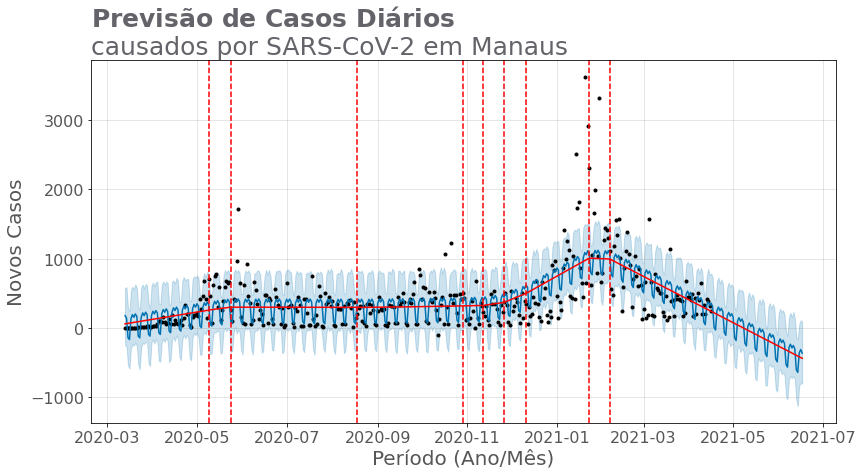

In [29]:
plot_previsao_changepoints('$\\bf{Previsão\ de\ Casos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Casos')

**A curva está se ajustando melhor aos pontos dessa forma**. Agora vou incluir os feriados municipais, estaduais e nacionais, que estão armanezados em uma [lista](#lista).

In [30]:
#Adicionando as listas ao DataFrame 
feriados_ma_2020 = pd.DataFrame({
  'holiday': 'ma_2020',
  'ds': pd.to_datetime(feriados_ma_2020)
})

feriados_ma_2021 = pd.DataFrame({
  'holiday': 'ma_2021',
  'ds': pd.to_datetime(feriados_ma_2021)
})

feriados = pd.concat((feriados_ma_2020, feriados_ma_2021)) #união das informações 

In [31]:
# Usando os feriados do município de Manaus
modelo_feriados = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, holidays=feriados)
modelo_feriados.fit(df)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=62)
previsao = modelo_feriados.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão com os feriados inclusos:

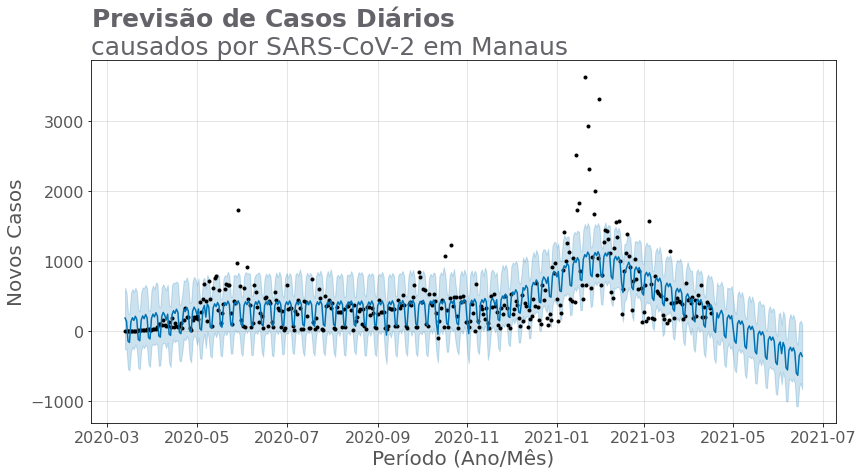

In [32]:
plot_previsao('$\\bf{Previsão\ de\ Casos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Casos')

Análise dos componentes, após a inserção dos feriados:

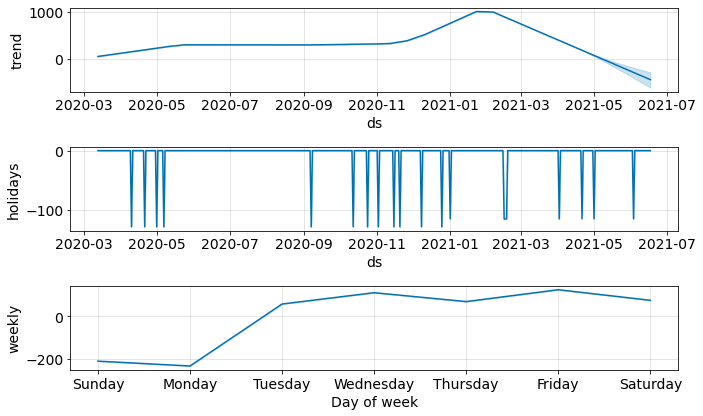

In [ ]:
modelo_feriados.plot_components(previsao, figsize=(10,6));

O gráfico *Holidays* mostra informações pontuais, que representam o impacto dos feriados, com decréscimo de casos notificados.

Weekly mostra que aos domingos e segundas temos menos casos notificados.

Podemos perceber que há uma baixa nos casos notificados, quando os dias úteis se tornam feriados.


###**Sazonalidade**

Agora vou verificar o efeito da sazonalidade, que pode ser aditiva ou multiplicativa.

- **Aditiva**: quando a série apresenta flutuações sazonais mais ou menos constantes, não importando o nível global da série. 

- **Multiplicativa**: quando o tamanho das flutuações sazonais variam dependendo do nível global da série.


####**Aditiva**

In [ ]:
#aditiva
modelo = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, seasonality_mode='additive',holidays=feriados, weekly_seasonality=7) #'additive'
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico com os resultados da sazonalidade aditiva:

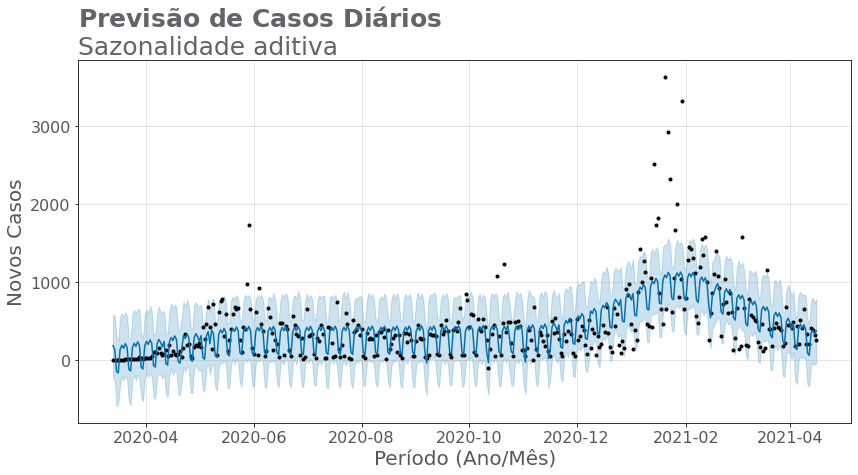

In [ ]:
plot_previsao('$\\bf{Previsão\ de\ Casos\ Diários\ }$\nSazonalidade aditiva', 'Período (Ano/Mês)', 'Novos Casos')

Para medir o ajuste dos dados utilizando o scikit-learn: quanto mais próximo de zero melhor está sendo nosso resultado. 

Cálculo da média do erro absoluto:

In [ ]:
mean_absolute_error(df['y'],previsao['yhat'][:400])

199.41193074060095

Outras métricas:

In [ ]:
median_absolute_error(y_true = df['y'], y_pred=previsao['yhat'][:400])
#O melhor valor possível é 0,0

141.34978949829764

In [ ]:
r2_score(y_true = df['y'], y_pred=previsao['yhat'][:400]) 
#A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior)

0.4944320139722128

####**Multiplicativa**

In [33]:
#multiplicativa
modelo = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, seasonality_mode='multiplicative',holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico com os resultados da sazonalidade multiplicativa:

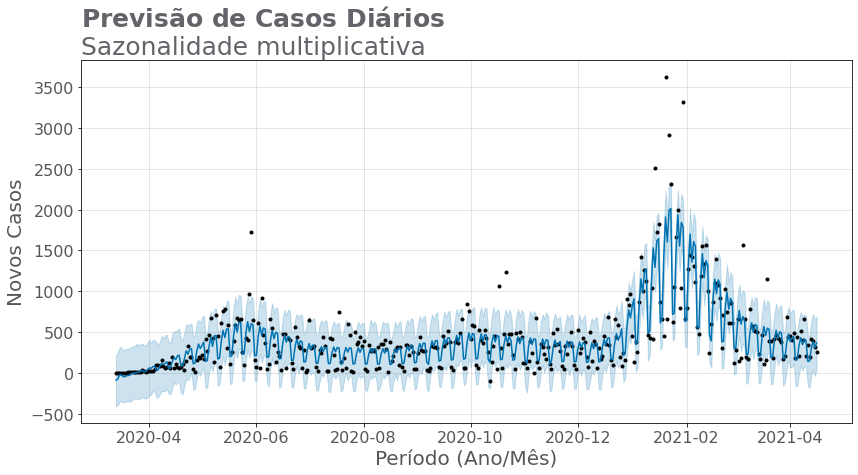

In [ ]:
plot_previsao('$\\bf{Previsão\ de\ Casos\ Diários\ }$\nSazonalidade multiplicativa', 'Período (Ano/Mês)', 'Novos Casos')

Para medir o ajuste dos dados utilizando o scikit-learn: quanto mais próximo de zero melhor está sendo nosso resultado.

Cálculo da média do erro absoluto:

In [ ]:
mean_absolute_error(df['y'],previsao['yhat'][:400])

151.99809205834953

Testando outras métricas:

In [ ]:
median_absolute_error(y_true = df['y'], y_pred=previsao['yhat'][:400])
#O melhor valor possível é 0,0

90.10705667365004

In [ ]:
r2_score(y_true = df['y'], y_pred=previsao['yhat'][:400])
#A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior)

0.6868221416386846

**A sazonalidade multiplicativa nos deu um resultado melhor aos dados de treino!**

Temos resultados melhores em todas as métricas quando comparamos com as métricas de sazonalidade aditiva.

###**Tratamento de outliers**

Resetando o index:

In [34]:
novo_y = df.reset_index()
novo_y #novo dataframe com o index removido

index         ds    y
0    52329 2020-03-13    2
1    52331 2020-03-14    0
2    52333 2020-03-15    0
3    52335 2020-03-16    0
4    52337 2020-03-17    0
..     ...        ...  ...
395  74936 2021-04-12  200
396  74999 2021-04-13  410
397  75062 2021-04-14  384
398  75125 2021-04-15  322
399  75188 2021-04-16  250

[400 rows x 3 columns]

In [35]:
sem_outliers = novo_y[(novo_y['y']> previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400])]
sem_outliers

index         ds    y
0    52329 2020-03-13    2
1    52331 2020-03-14    0
2    52333 2020-03-15    0
3    52335 2020-03-16    0
4    52337 2020-03-17    0
..     ...        ...  ...
395  74936 2021-04-12  200
396  74999 2021-04-13  410
397  75062 2021-04-14  384
398  75125 2021-04-15  322
399  75188 2021-04-16  250

[365 rows x 3 columns]

Gráfico evidenciando os Outliers: 

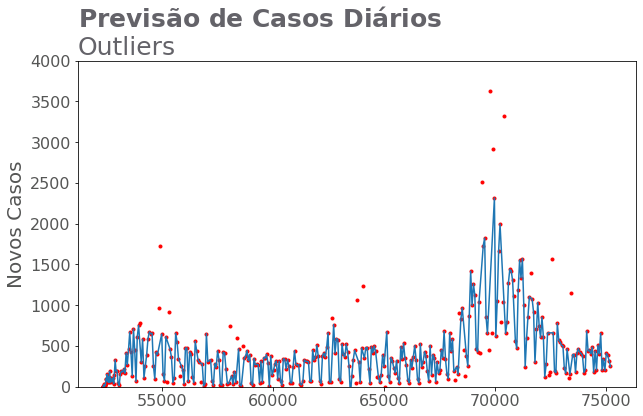

In [ ]:
plt.plot(df.index, df['y'],'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])
plt.title('$\\bf{Previsão\ de\ Casos\ Diários\ }$\nOutliers',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.xticks(fontsize=16, rotation=360, color=GRAY3)
plt.yticks(fontsize=16, color=GRAY3)
plt.xlabel('', fontsize=20, color=GRAY3)
plt.ylabel('Novos Casos', fontsize=20, color=GRAY3)
plt.ylim(0, 4000)
plt.show()

Os pontos vermelhos são os dados anteriores à retirada dos outliers. Agora vamos analisar sem os outliers:

In [36]:
df_sem_outliers = sem_outliers[['ds','y']]
df_sem_outliers

ds    y
0   2020-03-13    2
1   2020-03-14    0
2   2020-03-15    0
3   2020-03-16    0
4   2020-03-17    0
..         ...  ...
395 2021-04-12  200
396 2021-04-13  410
397 2021-04-14  384
398 2021-04-15  322
399 2021-04-16  250

[365 rows x 2 columns]

Modelo sem Outliers:

In [37]:
modelo = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


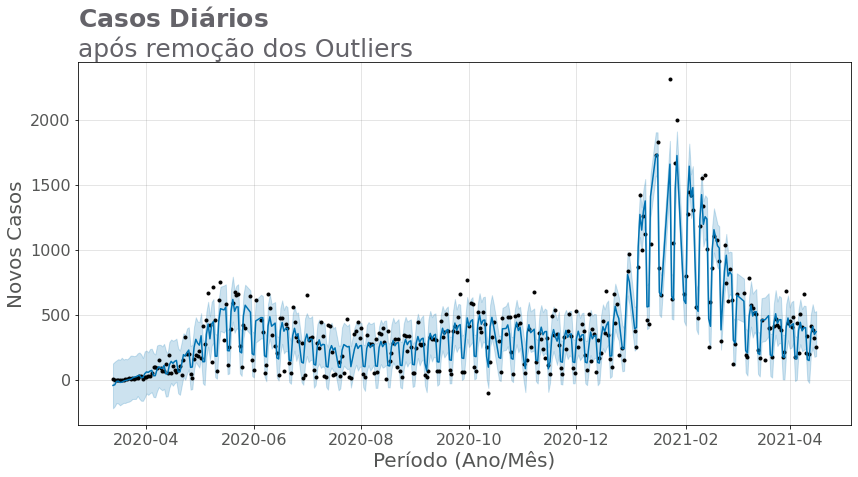

In [ ]:
plot_previsao('$\\bf{Casos\ Diários}$\napós remoção dos Outliers', 'Período (Ano/Mês)', 'Novos Casos')

Os outliers acabam enviesando negativamente as análises. 

O ajuste melhorou muito com a remoção dos outliers. 

**Agora temos poucos dados fora da curva.**

###**Intervalo de Confiança**
O intervalo onde estão nossas possíveis soluções.

Gerando a análise com previsão e dados de teste:

In [38]:
modelo = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=62)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão final, após todos os ajustes e remoção dos Outliers:

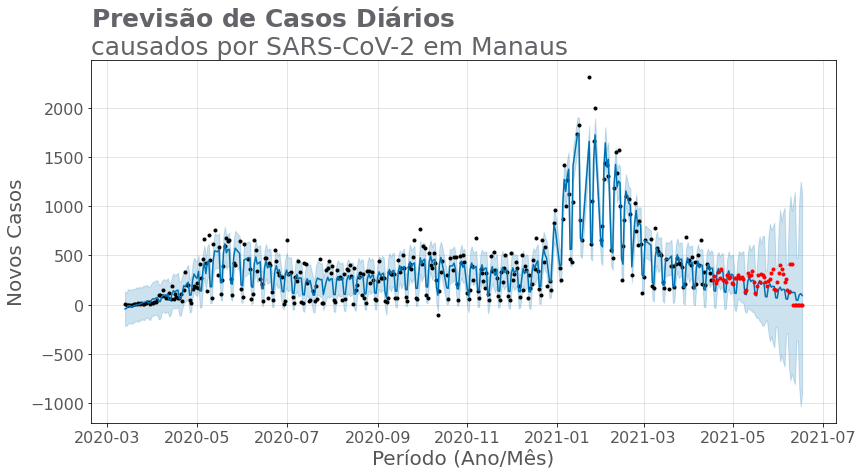

In [ ]:
plot_previsao_teste('$\\bf{Previsão\ de\ Casos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Casos')

Nesse modelo final tivemos quase todos os outliers removidos, a curva está bem ajustada e os dados de teste se encontram dentro do intervalo de confiança. Vemos, nos dados de teste, que quanto maior o tempo: maior o intervalo de confiança. 

Análise dos componentes:

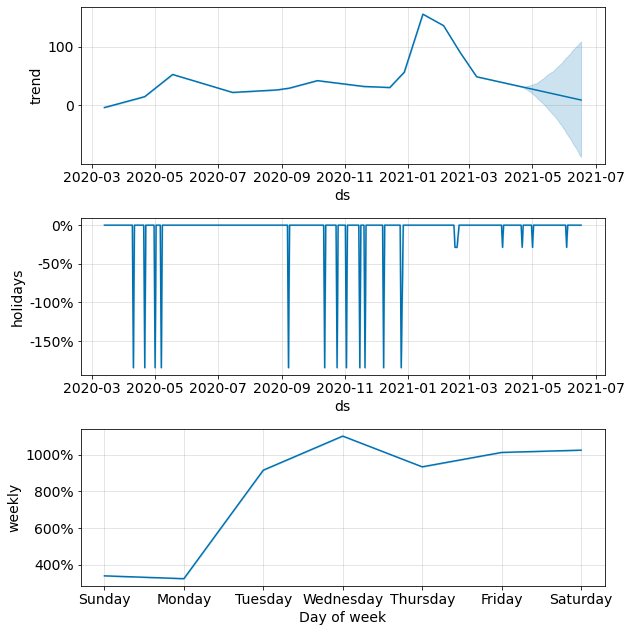

In [ ]:
modelo.plot_components(previsao);

A linha de tendência está bem diferente agora em relação ao primeiro modelo, com algumas quebras. 
Em holidays os feriados de 2021 tiveram menor impacto, pois os outliers foram retirados.

Gerando a análise com previsão e dados de teste para 60 dias:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


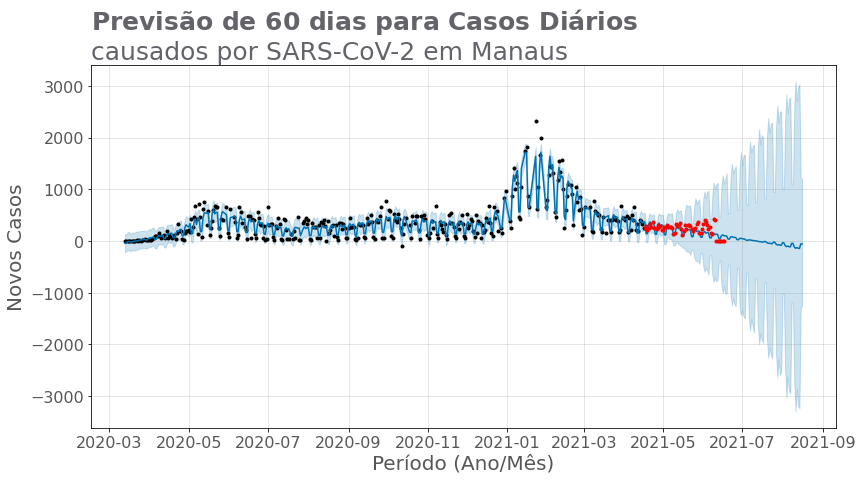

In [41]:
modelo = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=122)
previsao = modelo.predict(dataframefuturo)
plot_previsao_teste('$\\bf{Previsão\ de\ 60\ dias\ para\ Casos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Casos')

Quando testamos períodos mais longos, vemos que o intervalo de confiança tende a aumentar cada vez mais. No caso dessa previsão, a curva de tendência indica que os números de casos poderão se manter baixos nos próximos dois meses.



O ajuste do Prophet gera várias respostas de possíveis soluções:

In [ ]:
amostras = modelo.predictive_samples(previsao)

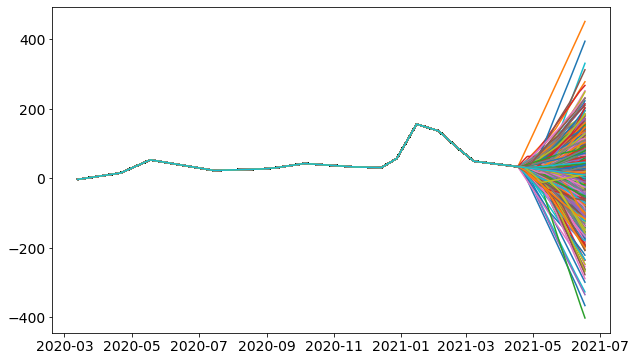

In [ ]:
plt.plot(previsao['ds'],amostras['trend']);

###**Validação (Cross validation)** 

Quando vamos validar nosso modelo separamos os dados em treino, validação e teste. 

Os dados de treino são os que o modelo vai usar para se ajustar. Os de validação são os o que vamos usar para calcular a performance do modelo enquanto alterarmos variáveis como os hiperparâmetros. 

E por fim, depois de selecionarmos o modelo ideal usamos os dados de teste para calcular a métrica final do modelo.

Essa etapa de separação dos dados pode nos gerar uma limitação, pois vamos validar nossos dados apenas uma vez, já que não podemos prever dados que estavam no conjunto de dados de treino.

Para resolver isso surgiu a técnica *Cross Validation* (CV), que cria mais possibilidades de validação do nosso modelo com a mesma quantidade de dados que tínhamos antes. 

Em modelos de classificação, nossos dados podem estar embaralhados e a CV, neste caso, também minimiza o efeito da aleatoriedade dos dados utilizados para treinar o modelo, tendo assim, um resultado mais próximo do real.

Criar dataframe de validação cruzada:

O critério para essa divisão será definido através de alguns parâmetros:

- o primeiro é o `initial`, que define a porção inicial de dados que serão usados para o treinamento

- outro parâmetro de atenção é o `horizon` que é o horizonte, que é o tamanho da previsão que será feita

- o seguinte é o `period` que definimos de quanto em quanto tempo definimos um novo horizonte para prever.

In [ ]:
df_cv = cross_validation(modelo, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-09-18 00:00:00 and 2021-03-17 00:00:00


Tivemos o parâmetro `initial` como 180 dias. Isso significa que o primeiro grupo será treinando com 180 dias dos dados disponíveis. O parâmetro `period` com 30 dias, indicando as divisões dos grupos será de 30 em 30 dias. Já o último é o parâmetro `horizon` que também é de 30 dias, indicando que o modelo de cada grupo fará a previsão para 30 dias.

7 previões foram realizadas! 

A função `cross_validation` divide os dados em diversos grupos e consegue treinar e validar o modelo diversas vezes. 

In [ ]:
df_cv.head()
#cutoff onde começam os dados de teste

ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2020-09-19  288.658457  126.648084  444.471804  373 2020-09-18
1 2020-09-20  141.689492  -12.086588  307.163454   75 2020-09-18
2 2020-09-21   84.440530  -76.433891  241.351520   40 2020-09-18
3 2020-09-22  324.721652  169.839991  470.197652  378 2020-09-18
4 2020-09-23  362.209785  205.984264  516.979008  412 2020-09-18

In [ ]:
df_cv['cutoff'].unique()

array(['2020-09-18T00:00:00.000000000', '2020-10-18T00:00:00.000000000',
       '2020-11-17T00:00:00.000000000', '2020-12-17T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-02-15T00:00:00.000000000',
       '2021-03-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
janela = 5 

In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Gráfico mostrando o resultado do *Cross Validation*:

Text(0.5, 0, 'ds')

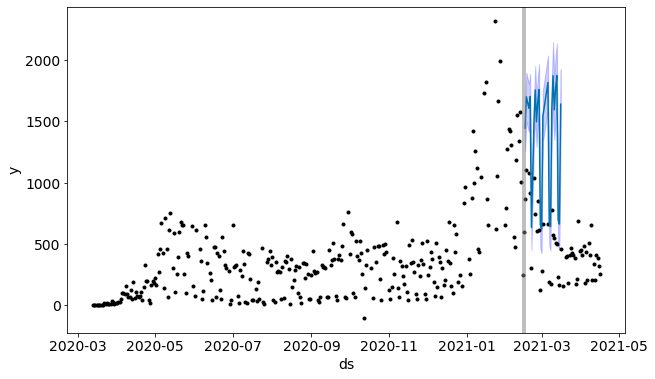

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

Cross validation é uma ferramenta estatística, que serve para saber o quanto nosso modelo está generalizando bem ou mal os nossos dados. 

- Em cinza temos o cuttoff

- A região em azul com intervalo de confiança e o trecho que foi usado pra teste. 


**Analisando as métricas de performance**:

In [ ]:
df_p = performance_metrics(df_cv)
df_p

horizon            mse        rmse         mae      mape     mdape  coverage
0   4 days   59400.960008  243.723122  166.542336  0.421484  0.355181  0.674603
1   5 days   74429.780901  272.818220  173.272149  0.432232  0.456499  0.722222
2   6 days   75197.481286  274.221592  186.550810  0.459655  0.456499  0.666667
3   7 days   81718.251406  285.864044  199.043824  0.425722  0.446912  0.555556
4   8 days   64750.878663  254.461940  200.951020  0.507225  0.490939  0.462963
5   9 days  135582.837648  368.215749  263.472244  0.583765  0.523028  0.425926
6  10 days  156525.487260  395.633021  268.124721  0.639900  0.532775  0.563492
7  11 days  161817.533675  402.265501  253.345557  0.556516  0.552174  0.694444
8  12 days  175371.477623  418.773779  261.797758  0.598675  0.513767  0.666667
9  13 days  195171.523374  441.782213  299.698321  0.822018  0.665191  0.579365
10 14 days  206527.734672  454.453226  345.150761  0.925094  0.661680  0.370370
11 15 days  190346.228120  436.286864  349.640189  0.934156  0.689103  0.355556
12 16 days  154582.843197  393.170247  315.471079  0.846960  0.689103  0.355556
13 17 days  145999.499868  382.098809  297.299512  0.747564  0.585219  0.398148
14 18 days  125418.998842  354.145449  277.034285  0.723369  0.518107  0.305556
15 19 days  210601.078198  458.912931  346.338795  0.651635  0.538645  0.277778
16 20 days  293886.723895  542.113202  403.834049  0.771033  0.679437  0.324074
17 21 days  317409.742132  563.391287  439.471121  0.905220  0.708667  0.314815
18 22 days  298802.243768  546.628067  435.707640  0.996787  0.781083  0.285714
19 23 days  359998.840444  599.999034  462.282209  0.942098  0.745891  0.314815
20 24 days  389233.498733  623.885806  478.405172  1.009308  0.768780  0.285714
21 25 days  402875.083958  634.724416  504.151430  1.368111  0.934295  0.150794
22 26 days  432517.761536  657.660826  531.929221  1.469071  1.133018  0.142857
23 27 days  401711.592611  633.807220  510.507313  1.334344  0.809942  0.222222
24 28 days  460885.434479  678.885435  525.774540  1.241085  0.744672  0.333333
25 29 days  550927.071728  742.244617  575.593983  1.426692  1.161836  0.349206
26 30 days  611580.860291  782.036355  566.971225  1.325793  0.848914  0.462963

Algumas métricas foram calculadas, medindo o quanto a nossa previsão está errando:

- **MSE**: Média do erro ao quadrado

- **RMSE**: Raiz quadrada da métrica MSE

- **MAE**: Média do erro absoluto

- **MAPE**: Média do erro absoluto percentual

- **MDAPE**: Mediana do erro absoluto percentual

A ideia é ver se o *Cross validation* está generalizando os dados.

Quanto menos disperso: melhor está sendo o nosso resultado!

**MSE**

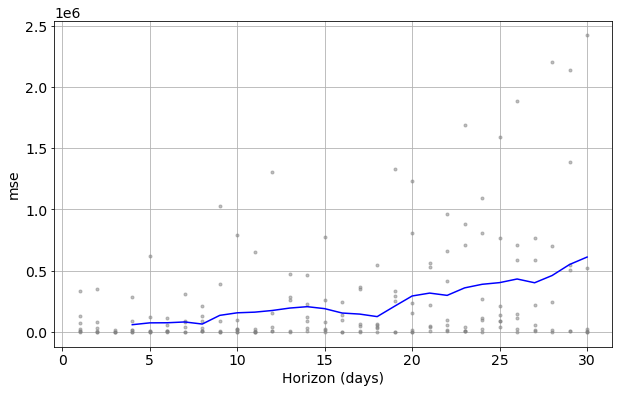

In [ ]:
plot_cross_validation_metric(df_cv, metric='mse'); #Média do erro ao quadrado

A MSE é a média obtida após calcular a diferença do valor real pelo valor previsto, elevando ao quadrado e realizando a média. Essa métrica dá um peso maior para erros maiores, já que todos os valores são elevados ao quadrado. Vemos que a maioria dos pontos está próxima de zero, porém temos alguns pontos dispersos. 

**RMSE**

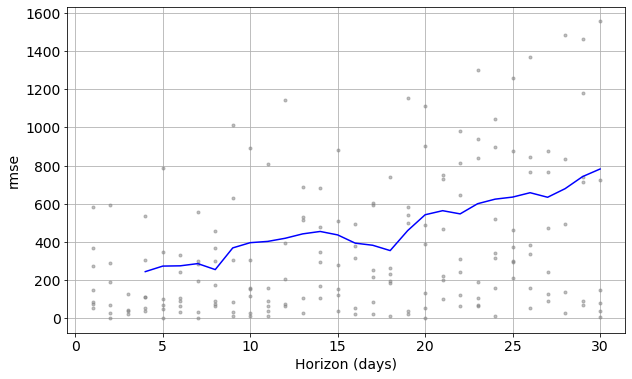

In [ ]:
fig = plot_cross_validation_metric(df_cv,metric='rmse') #Erro médio quadrático. 


No caso da raiz quadrada da métrica MSE os dados estão ainda mais dispersos.

**MAE**

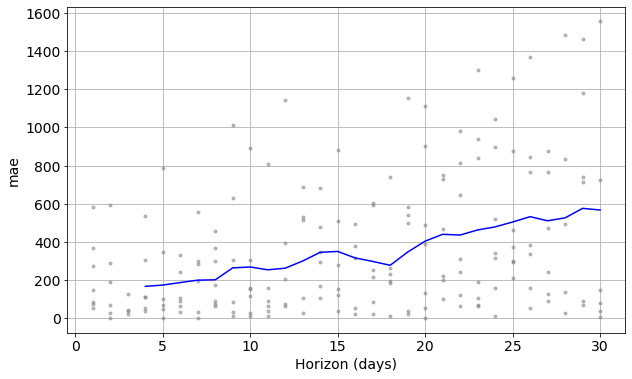

In [ ]:
plot_cross_validation_metric(df_cv, metric='mae'); #Média do erro absoluto

O resultado da MAE ficou similar ao resultado anterior feito com o RMSE.

**MAPE**

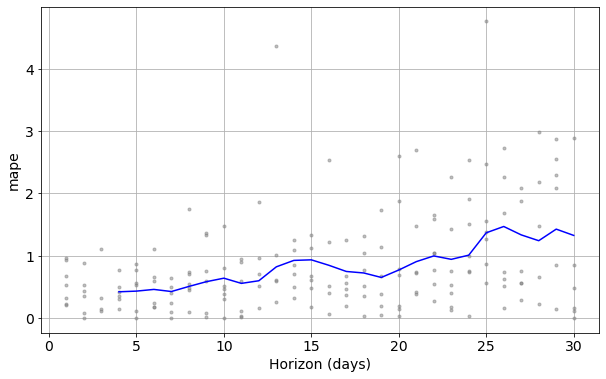

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape'); #Média do erro absoluto percentual

Nessa métrica a dispersão foi menor e dados estão mais centralizados.

**MDAPE**

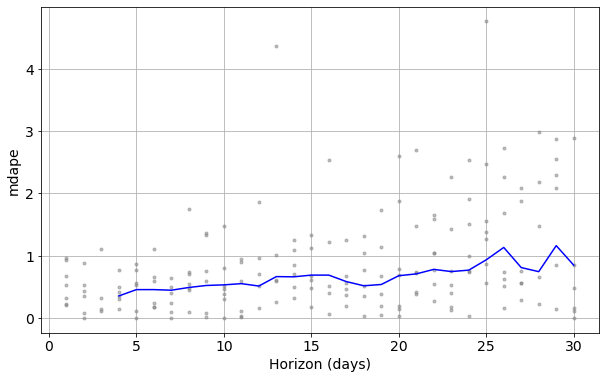

In [ ]:
plot_cross_validation_metric(df_cv, metric='mdape'); #Mediana do erro absoluto percentual

Assim como na MAPE, a dispersão foi menor e dados estão mais centralizados.

No geral, vemos que **quanto maior o número de dias**, **maior é a dispersão dos dados no nosso modelo**. Como esse projeto está usando dados reais da Pandemia de COVID-19, sabemos que em muitos momentos da pandemia os dados sofreram grandes mudanças, com picos de casos e óbitos e isso influencia nessa questão da dispersão dos pontos no modelo.
Se fosse uma série temporal estabilizada, contendo dados de um tempo maior, possivelmente, os erros vistos nesses parâmetros poderiam ser bem menores do que estamos vendo aqui. 


<a name="obitos"></a>
##**Previsão de Novos Óbitos, causados pelo SARS-CoV-2, em Manaus**

A primeira etapa é selecionar quais dados serão `ds` e `y`.

Como eu quero prever novos óbitos, a coluna `new_deaths` será o `y` e coluna date será o `ds`:

In [43]:
df = pd.DataFrame()
df['ds'] = dados_manaus['date']
df['y'] = dados_manaus['new_deaths']
df

ds  y
52329 2020-03-13  0
52331 2020-03-14  0
52333 2020-03-15  0
52335 2020-03-16  0
52337 2020-03-17  0
...          ... ..
78842 2021-06-13  0
78905 2021-06-14  0
78968 2021-06-15  0
79031 2021-06-16  0
79094 2021-06-17  0

[462 rows x 2 columns]

Primeira previsão:

In [44]:
modelo = Prophet()
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=30) 
previsao = modelo.predict(dataFramefuture)
previsao.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      trend  ...  multiplicative_terms_upper       yhat
0 2020-03-13  13.204118  ...                         0.0  13.803197
1 2020-03-14  13.192035  ...                         0.0  12.146856
2 2020-03-15  13.179951  ...                         0.0   5.157611
3 2020-03-16  13.167867  ...                         0.0   9.628795
4 2020-03-17  13.155783  ...                         0.0  15.512404

[5 rows x 16 columns]

O yhat é a nossa estimativa! Agora vamos plotar a previsão:

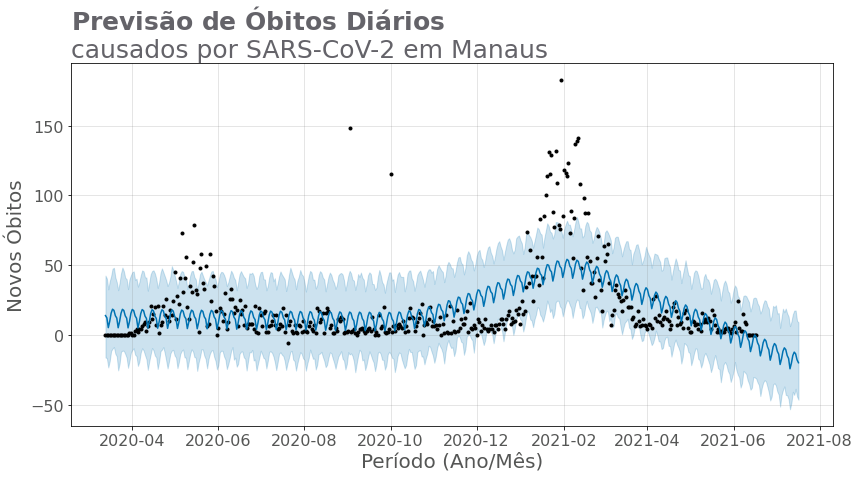

In [ ]:
plot_previsao('$\\bf{Previsão\ de\ Óbitos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Óbitos')

Esses pontos em preto são os nossos dados reais. O modelo ajustado é a curva em azul escuro e temos valores para frente, que foram previstos para 30 dias. Há uma região azul mais clara que é o nosso intervalo de confiança. **Alguns pontos estão fora do intervalo de confiança e isso significa que o modelo só ajustou a maioria dos dados.**

####**Previsão com dados separados em treino e teste**

Para saber se essa previsão é boa: basta dividir os dados em treino e teste!

In [45]:
df = pd.DataFrame()

Separando os dados de treino:

In [46]:
df['ds'] = dados_manaus['date'][:400]
df['y'] = dados_manaus['new_deaths'][:400]

Separando os dados de teste:

In [47]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_manaus['date'][400:]
df_teste['y'] = dados_manaus['new_deaths'][400:]

Treinando o modelo e fazendo a previsão:

In [48]:
modelo = Prophet()
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=62)
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão, com os dados de treino e teste:

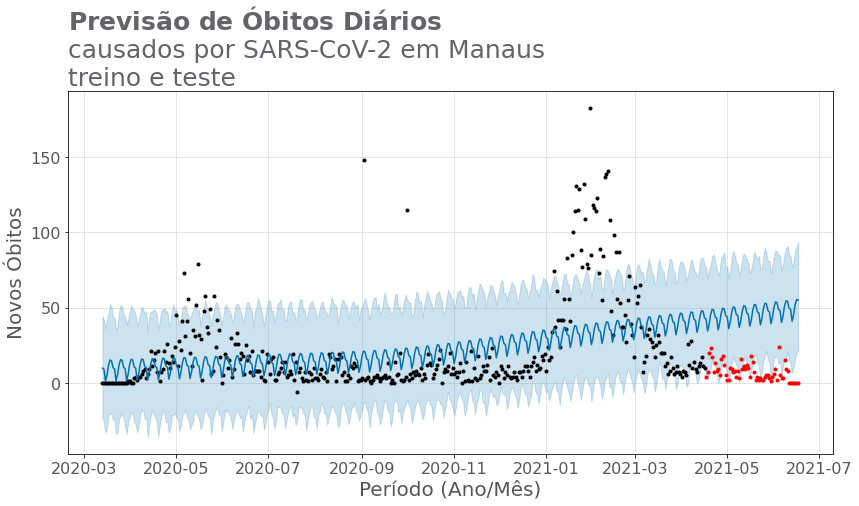

In [ ]:
plot_previsao_teste('$\\bf{Previsão\ de\ Óbitos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus\ntreino e teste', 'Período (Ano/Mês)', 'Novos Óbitos')

A divisão entre treino e teste é de extrema importância, para saber se o modelo está bom. Vemos que **todos os pontos vermelhos (do teste) não estão próximas ao ajuste**. Portanto, **mais ajustes precisam ser realizados**, pois os pontos de teste precisam estar mais aderentes à curva.

Análise da tendência e de como os dados se comportam semanalmente:

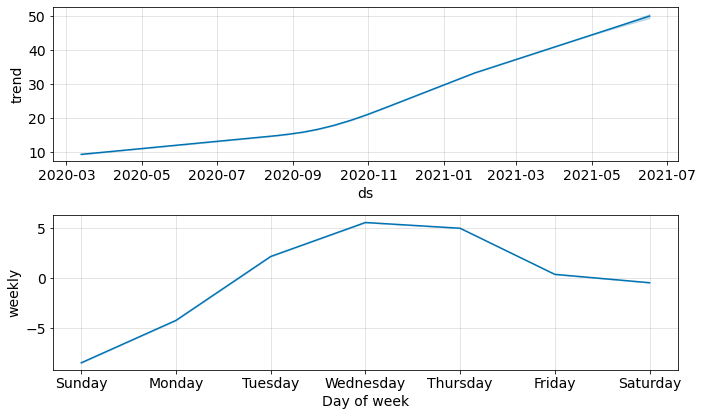

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

O primeiro gráfico representa a tendência ao longo do tempo. O segundo gráfico representa a sazonalidade semanal, mostrando que nos domingos e segundas há uma diminuição da notificação dos óbitos e que às sextas e sábados as notificações sofrem uma queda.

###**Adicionando os Changepoints aos modelos:**

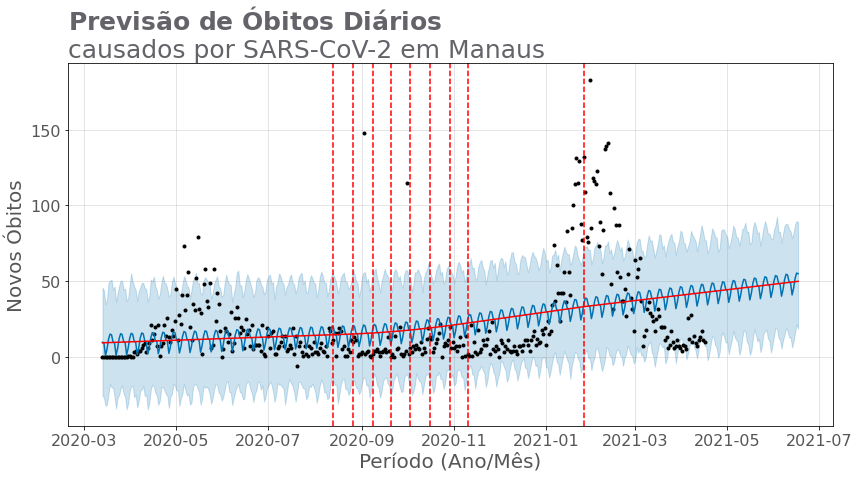

In [49]:
plot_previsao_changepoints('$\\bf{Previsão\ de\ Óbitos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Óbitos')

**Novo modelo adicionando `n_changepoints` e aumentando o range default para `changepoint_range=0.90`:**

In [50]:
modelo = Prophet(n_changepoints=25, changepoint_range=0.90)
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=62)
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão com *changepoints* modificados: 

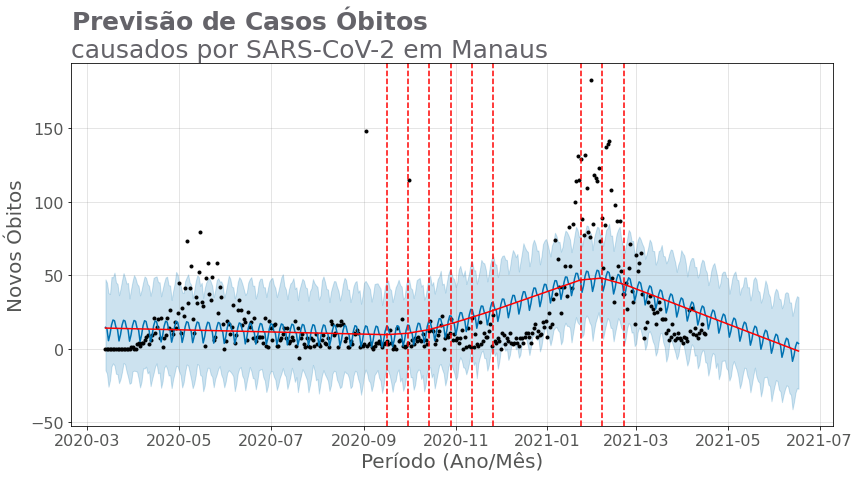

In [ ]:
plot_previsao_changepoints('$\\bf{Previsão\ de\ Casos\ Óbitos\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Óbitos')

**A curva está se ajustando melhor aos pontos dessa forma. Agora, vou aumentar a flexibilidade dos `changepoints `, com `changepoint_prior_scale=0.1`:**

In [51]:
modelo = Prophet(n_changepoints=25, changepoint_range=0.90, changepoint_prior_scale=0.10)
#changepoint_prior_scale: quanto menor o valor menos mudanças serão vistas.
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=62)
previsao = modelo.predict(dataFramefuture)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão com *changepoints* modificados: 

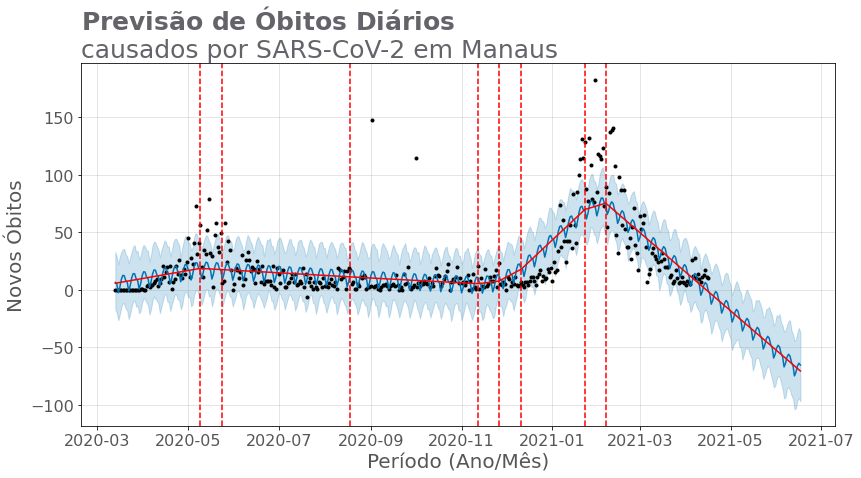

In [ ]:
plot_previsao_changepoints('$\\bf{Previsão\ de\ Óbitos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Óbitos')

A curva está se ajustando melhor aos pontos dessa forma. Agora vou incluir os feriados municipais, estaduais e nacionais, que estão armanezados em uma [lista](#lista) e que foram adiocionados ao dataframe `feriados`: 

In [52]:
feriados

holiday         ds
0   ma_2020 2020-04-10
1   ma_2020 2020-04-10
2   ma_2020 2020-04-21
3   ma_2020 2020-05-01
4   ma_2020 2020-05-07
5   ma_2020 2020-09-07
6   ma_2020 2020-10-24
7   ma_2020 2020-10-12
8   ma_2020 2020-11-20
9   ma_2020 2020-11-02
10  ma_2020 2020-11-15
11  ma_2020 2020-12-08
12  ma_2020 2020-12-25
0   ma_2021 2021-01-01
1   ma_2021 2021-02-15
2   ma_2021 2021-02-16
3   ma_2021 2021-02-17
4   ma_2021 2021-04-02
5   ma_2021 2021-04-21
6   ma_2021 2021-05-01
7   ma_2021 2021-06-03

In [53]:
# Usando os feriados:
modelo_feriados = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, holidays=feriados)
modelo_feriados.fit(df)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=62)
previsao = modelo_feriados.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão após inclusão dos feriados:

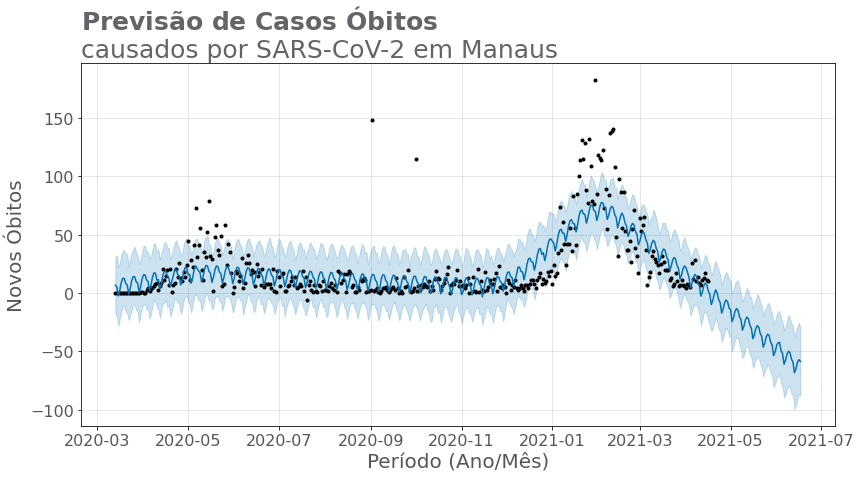

In [ ]:
plot_previsao('$\\bf{Previsão\ de\ Casos\ Óbitos\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Óbitos')

Análise dos componentes, após a inserção dos feriados:

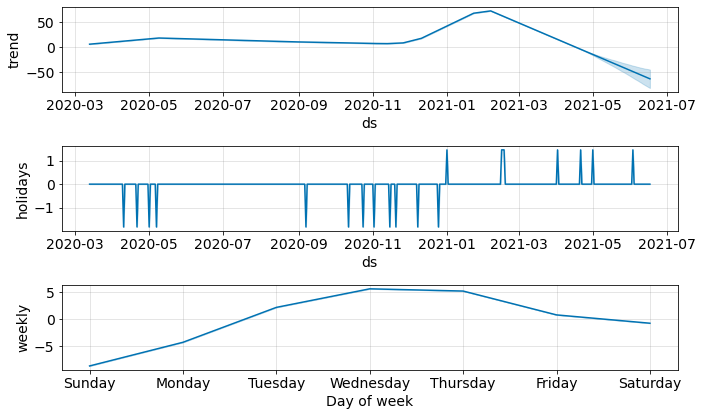

In [ ]:
modelo_feriados.plot_components(previsao, figsize=(10,6));

O gráfico *Holidays* mostra informações pontuais, que representam o impacto dos feriados, com decréscimo de casos notificados.

**Weekly mostra que aos domingos e segundas temos menos óbitos notificados, e nas sextas e sábados há uma queda.**

**Podemos notar que há uma baixa nos óbitos notificados, quando os dias úteis se tornam feriados. Porém, em 2021 os feriados não tiveram o mesmo impacto nas notificações.**


###**Sazonalidade**

####**Aditiva**

In [ ]:
#aditiva
modelo = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, seasonality_mode='additive',holidays=feriados, weekly_seasonality=7) #'additive'
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão com sazonalidade aditiva:

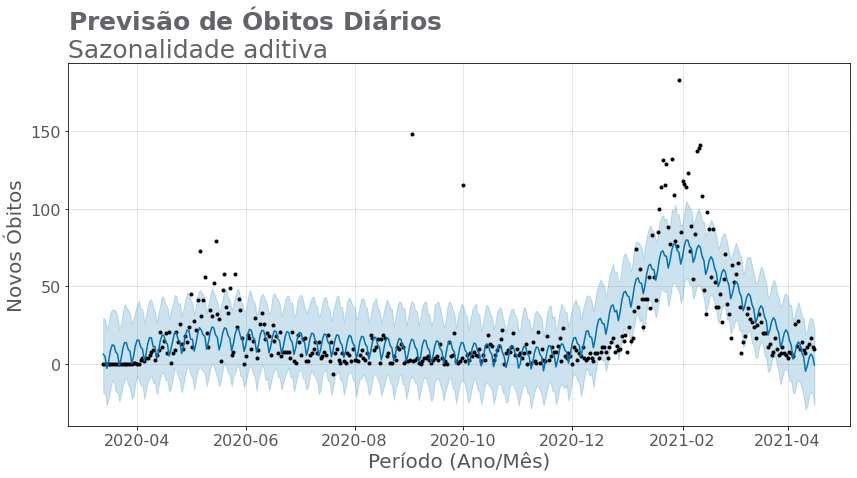

In [ ]:
plot_previsao('$\\bf{Previsão\ de\ Óbitos\ Diários\ }$\nSazonalidade aditiva', 'Período (Ano/Mês)', 'Novos Óbitos')

Para medir o ajuste dos dados utilizando o scikit-learn: quanto mais próximo de zero melhor está sendo nosso resultado.

Cálculo da média do erro absoluto:

In [ ]:
mean_absolute_error(df['y'],previsao['yhat'][:400])

12.291806089969036

Outras métricas:

In [ ]:
median_absolute_error(y_true = df['y'], y_pred=previsao['yhat'][:400])
#O melhor valor possível é 0,0

12.291806089969036

In [ ]:
r2_score(y_true = df['y'], y_pred=previsao['yhat'][:400])
#A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior)

0.6089773008157204

####**Multiplicativa**

In [54]:
#multiplicativa
modelo = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, seasonality_mode='multiplicative',holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gráfico da previsão com sazonalidade multiplicativa:

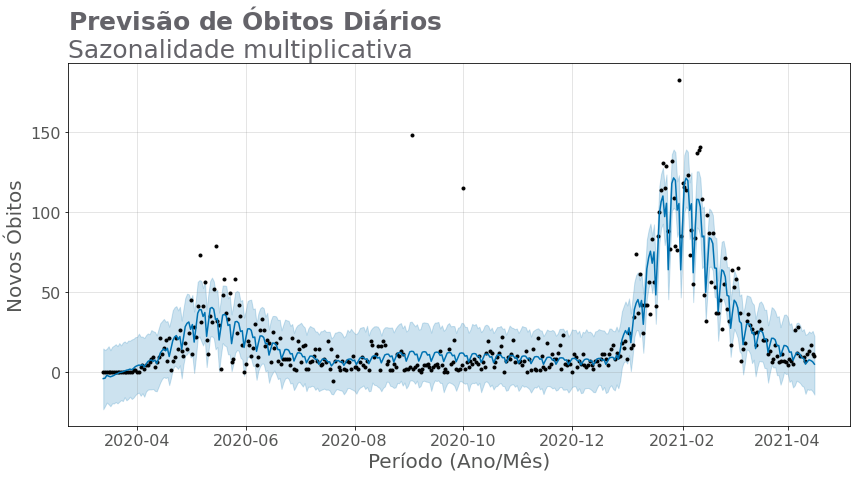

In [ ]:
plot_previsao('$\\bf{Previsão\ de\ Óbitos\ Diários\ }$\nSazonalidade multiplicativa', 'Período (Ano/Mês)', 'Novos Óbitos')

Para medir o ajuste dos dados utilizando o scikit-learn: quanto mais próximo de zero melhor está sendo nosso resultado.

Cálculo da média do erro absoluto:

In [ ]:
mean_absolute_error(df['y'],previsao['yhat'][:400])

8.133425636327013

Testando outras métricas:

In [ ]:
median_absolute_error(y_true = df['y'], y_pred=previsao['yhat'][:400])
#O melhor valor possível é 0,0

5.401835133447121

In [ ]:
r2_score(y_true = df['y'], y_pred=previsao['yhat'][:400])
#A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior)

0.7795110592875769

**A sazonalidade multiplicativa nos deu um resultado melhor aos dados de treino!** 

Temos resultados melhores em todas as métricas quando comparamos com as métricas de sazonalidade aditiva. 

Os valores das métricas ficaram ótimos, com média do erro absoluto de apenas 8.1, no caso da sazonalidade multiplicativa.

###**Tratamento de outliers**

Resetando o index:

In [55]:
novo_y = df.reset_index()
novo_y #novo dataframe com o index removido

index         ds   y
0    52329 2020-03-13   0
1    52331 2020-03-14   0
2    52333 2020-03-15   0
3    52335 2020-03-16   0
4    52337 2020-03-17   0
..     ...        ...  ..
395  74936 2021-04-12  11
396  74999 2021-04-13  13
397  75062 2021-04-14  17
398  75125 2021-04-15  11
399  75188 2021-04-16  10

[400 rows x 3 columns]

In [56]:
sem_outliers = novo_y[(novo_y['y']> previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400])]
sem_outliers

index         ds   y
0    52329 2020-03-13   0
1    52331 2020-03-14   0
2    52333 2020-03-15   0
3    52335 2020-03-16   0
4    52337 2020-03-17   0
..     ...        ...  ..
395  74936 2021-04-12  11
396  74999 2021-04-13  13
397  75062 2021-04-14  17
398  75125 2021-04-15  11
399  75188 2021-04-16  10

[361 rows x 3 columns]

Gráfico evidenciando os *Outliers*: 

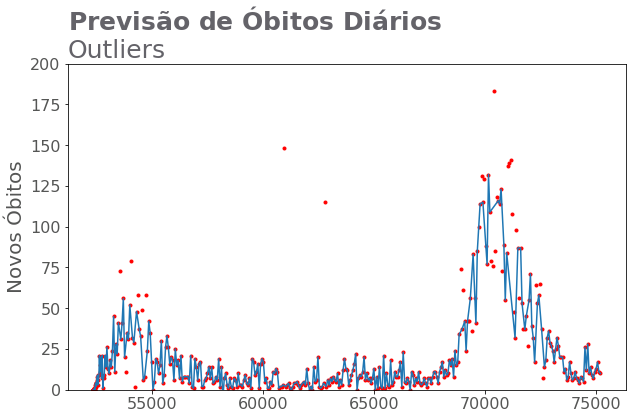

In [ ]:
plt.plot(df.index, df['y'],'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])
plt.title('$\\bf{Previsão\ de\ Óbitos\ Diários\ }$\nOutliers',
          loc = 'left', fontsize = 25, color = GRAY4)
plt.xticks(fontsize=16, rotation=360, color=GRAY3)
plt.yticks(fontsize=16, color=GRAY3)
plt.xlabel('', fontsize=20, color=GRAY3)
plt.ylabel('Novos Óbitos', fontsize=20, color=GRAY3)
plt.ylim(0, 200)
plt.show()

Os pontos vermelhos são os dados anteriores à retirada dos outliers. Agora vamos analisar sem os outliers:

In [57]:
df_sem_outliers = sem_outliers[['ds','y']]
df_sem_outliers

ds   y
0   2020-03-13   0
1   2020-03-14   0
2   2020-03-15   0
3   2020-03-16   0
4   2020-03-17   0
..         ...  ..
395 2021-04-12  11
396 2021-04-13  13
397 2021-04-14  17
398 2021-04-15  11
399 2021-04-16  10

[361 rows x 2 columns]

Modelo sem *Outliers*:

In [58]:
modelo = Prophet(n_changepoints = 25, changepoint_range=0.90, changepoint_prior_scale=0.1, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


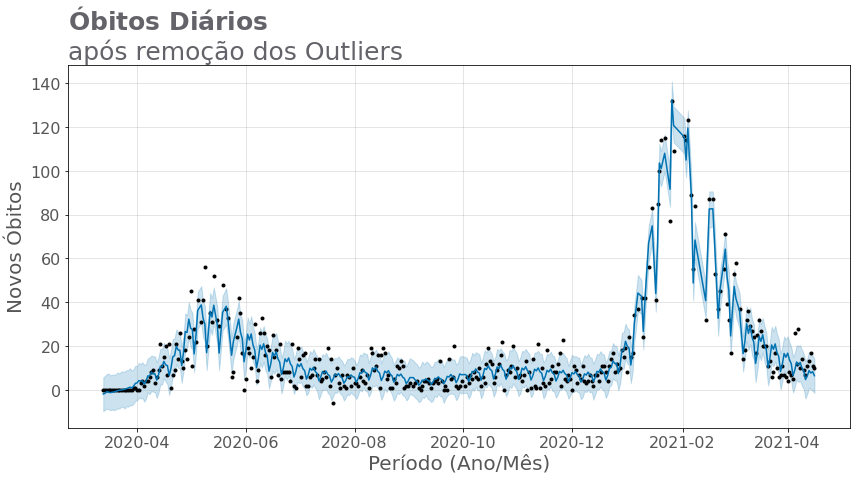

In [ ]:
plot_previsao('$\\bf{Óbitos\ Diários}$\napós remoção dos Outliers', 'Período (Ano/Mês)', 'Novos Óbitos')

Os outliers acabam enviesando negativamente as análises.

O ajuste melhorou muito com a remoção dos outliers.

Agora temos poucos dados fora da curva.

###**Intervalo de Confiança**
O intervalo onde estão nossas possíveis soluções.

Gerando a análise com previsão e dados de teste:

In [59]:
modelo = Prophet(n_changepoints = 25, changepoint_range=0.92, changepoint_prior_scale=0.1, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=62)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


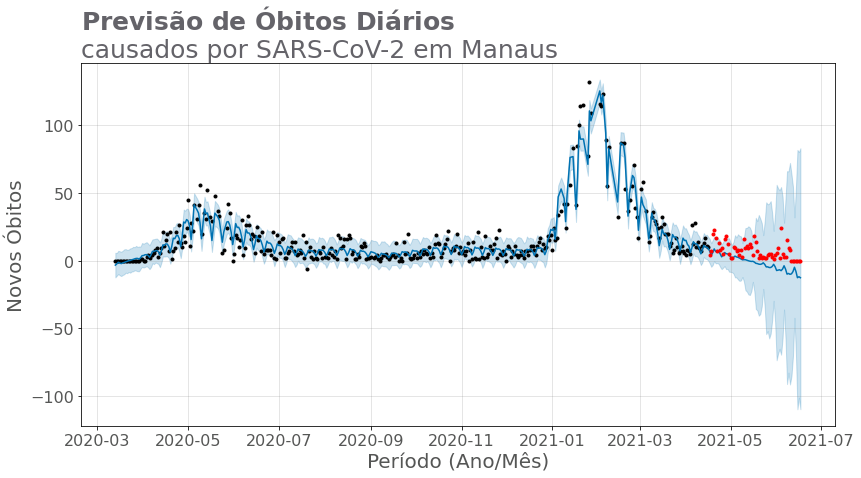

In [ ]:
plot_previsao_teste('$\\bf{Previsão\ de\ Óbitos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Óbitos')

Nesse modelo final tivemos quase todos os outliers removidos, 
a curva está bem ajustada e os dados de teste se encontram 
dentro do intervalo de confiança. Vemos, nos dados de teste, 
que quanto maior o tempo: maior o intervalo de confiança.


Análise dos componentes:

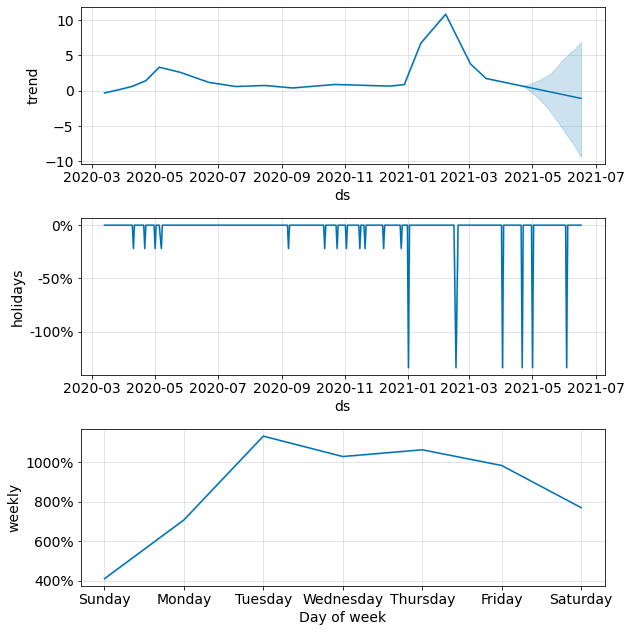

In [ ]:
modelo.plot_components(previsao);

A linha de tendência está bem diferente agora em relação ao primeiro modelo, com algumas quebras. Após a remoção dos outliers, os feriados de 2021 tiveram maior impacto. 

Gerando a análise com previsão e dados de teste para 60 dias:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


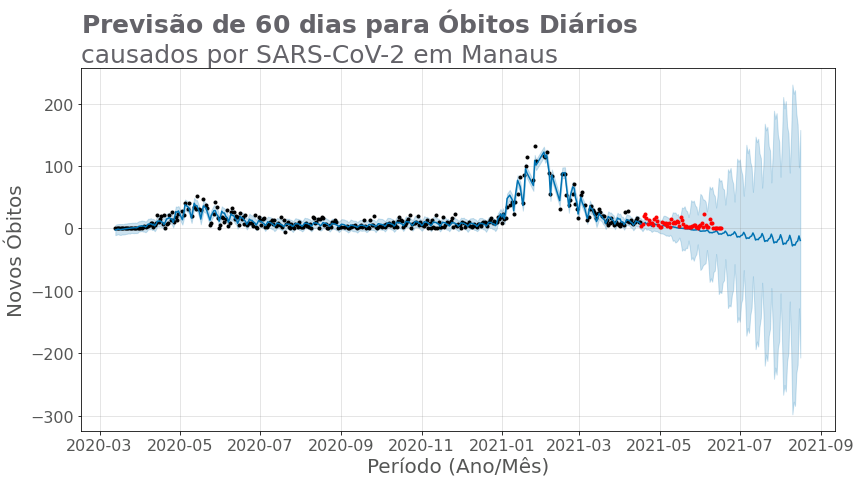

In [61]:
modelo = Prophet(n_changepoints = 25, changepoint_range=0.92, changepoint_prior_scale=0.1, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=122)
previsao = modelo.predict(dataframefuturo)
plot_previsao_teste('$\\bf{Previsão\ de\ 60\ dias\ para\ Óbitos\ Diários\ }$\ncausados por SARS-CoV-2 em Manaus', 'Período (Ano/Mês)', 'Novos Óbitos')

Quando testamos períodos mais longos, vemos que o intervalo de confiança tende a aumentar cada vez mais. No caso dessa previsão, a curva de tendência indica que os números de óbitos poderão se manter baixos nos próximos dois meses.

O ajuste do Prophet gera várias respostas de possíveis soluções:

In [ ]:
amostras = modelo.predictive_samples(previsao)

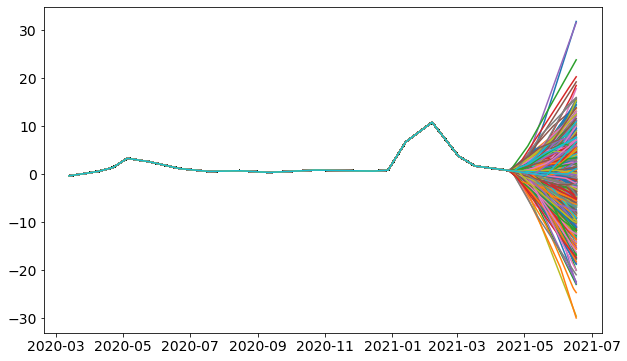

In [ ]:
plt.plot(previsao['ds'],amostras['trend']);

###**Validação (Cross-validation)** 

In [ ]:
df_cv = cross_validation(modelo, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-09-18 00:00:00 and 2021-03-17 00:00:00


In [ ]:
df_cv.head()
#cutoff onde começam os dados de teste

ds      yhat  yhat_lower  yhat_upper   y     cutoff
0 2020-09-19  4.433889   -2.830065   12.482827   4 2020-09-18
1 2020-09-20  2.530093   -5.030125   10.520713   0 2020-09-18
2 2020-09-21  1.829361   -6.401249    9.115895   2 2020-09-18
3 2020-09-22  4.638560   -3.011845   13.022857   0 2020-09-18
4 2020-09-23  3.516362   -3.765987   11.120650  14 2020-09-18

In [ ]:
df_cv['cutoff'].unique()

array(['2020-09-18T00:00:00.000000000', '2020-10-18T00:00:00.000000000',
       '2020-11-17T00:00:00.000000000', '2020-12-17T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-02-15T00:00:00.000000000',
       '2021-03-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
janela = 5 

In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Gráfico mostrando o resultado do *Cross-Validation*:

Text(0.5, 0, 'ds')

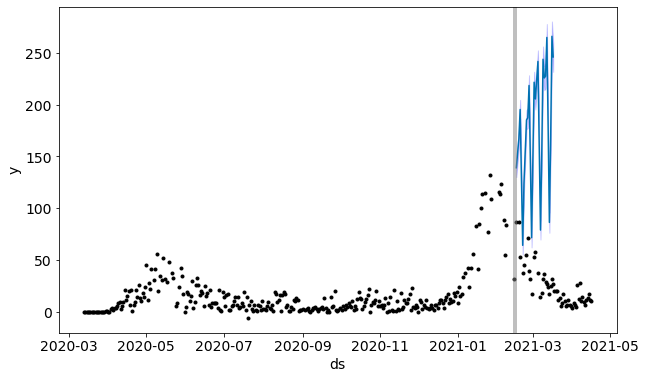

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

Cross-validation é uma ferramenta estatística, que serve para saber o quanto nosso modelo está generalizando bem ou mal os nossos dados. 

- Em cinza temos o cuttoff

- A região em azul com intervalo de confiança e o trecho que foi usado pra teste. 

**Analisando as métricas de performance**:

In [ ]:
df_p = performance_metrics(df_cv)
df_p

INFO:fbprophet:Skipping MAPE because y close to 0


horizon          mse       rmse        mae     mdape  coverage
0   3 days   728.336702  26.987714  15.394635  0.405720  0.642857
1   4 days  1878.815630  43.345307  23.144273  0.527616  0.648148
2   5 days  1730.440592  41.598565  21.413988  0.527319  0.579365
3   6 days  1300.164585  36.057795  18.451991  0.577348  0.515873
4   7 days   531.953322  23.064113  13.877107  0.599558  0.444444
5   8 days   556.433341  23.588839  14.529919  0.615425  0.500000
6   9 days  1454.460311  38.137387  20.283106  0.524465  0.500000
7  10 days  2038.965283  45.154903  25.002978  0.617889  0.522222
8  11 days  3461.760201  58.836725  32.251124  0.671990  0.484127
9  12 days  3384.594019  58.177264  31.263732  0.746824  0.492063
10 13 days  2912.237408  53.965150  28.241083  0.746824  0.444444
11 14 days  1604.792541  40.059862  20.881302  0.724623  0.436508
12 15 days  2158.255406  46.457028  22.335925  0.667345  0.500000
13 16 days  3004.281983  54.811331  26.840058  0.715633  0.522222
14 17 days  3018.842092  54.943990  27.762648  0.780747  0.500000
15 18 days  3611.493829  60.095706  30.072682  0.780747  0.416667
16 19 days  2762.856481  52.562881  26.616993  0.730422  0.370370
17 20 days  3051.779448  55.242913  29.624237  0.647414  0.444444
18 21 days  1921.081554  43.830144  27.773801  0.835079  0.444444
19 22 days  4346.608351  65.928813  37.038495  1.474369  0.500000
20 23 days  5892.769032  76.764373  44.370392  1.494331  0.341270
21 24 days  6856.684838  82.805102  47.608055  1.597599  0.361111
22 25 days  7597.590593  87.164159  49.443613  1.450750  0.380952
23 26 days  7440.553339  86.258642  49.042457  3.197877  0.396825
24 27 days  5879.352098  76.676933  45.059401  1.450750  0.361111
25 28 days  4708.280940  68.616914  43.461589  1.808631  0.388889
26 29 days  5846.404058  76.461782  48.666225  1.125040  0.444444
27 30 days  8166.143046  90.366714  55.434637  1.125040  0.518519

**Análise de cada métrica**

A linha azul mostra a métrica, onde a média é obtida sobre uma janela rolante de pontos. Vemos, por esta previsão, que erros vão aumentando de acordo com o tempo:



**MSE**

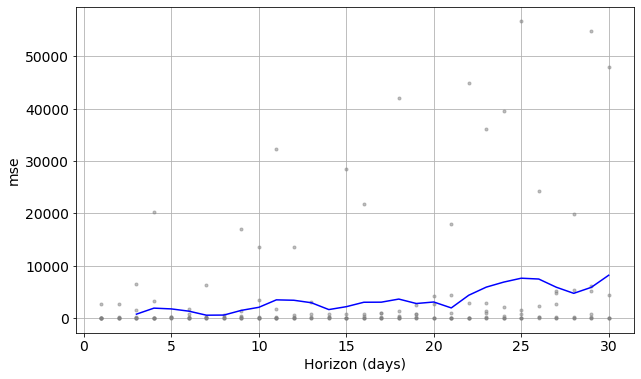

In [ ]:
plot_cross_validation_metric(df_cv, metric='mse'); #Média do erro ao quadrado

A MSE é a média obtida após calcular a diferença do valor real pelo valor previsto, elevando ao quadrado e realizando a média. Essa métrica dá um peso maior para erros maiores, já que todos os valores são elevados ao quadrado. O resultado dessa métrica para o modelo de previsão de Novos Óbitos, foi melhor do que vimos no modelo de Novos Casos. Vemos que a maioria dos pontos está próxima de zero e temos poucos pontos dispersos. 

**RMSE**

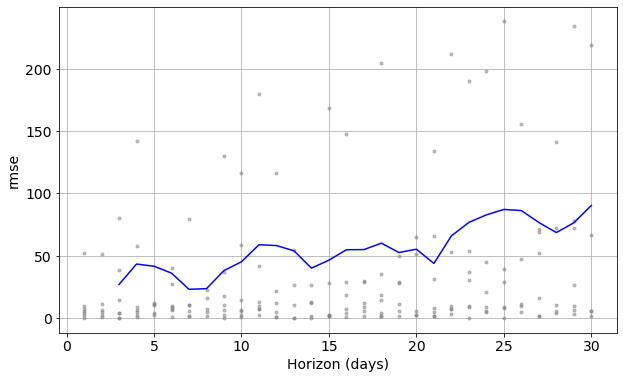

In [ ]:
fig = plot_cross_validation_metric(df_cv,metric='rmse') #Erro médio quadrático. 

No caso da raiz quadrada da métrica MSE os dados estão mais dispersos, porém a dispersão acima do modelo não é alta.

**MAE**

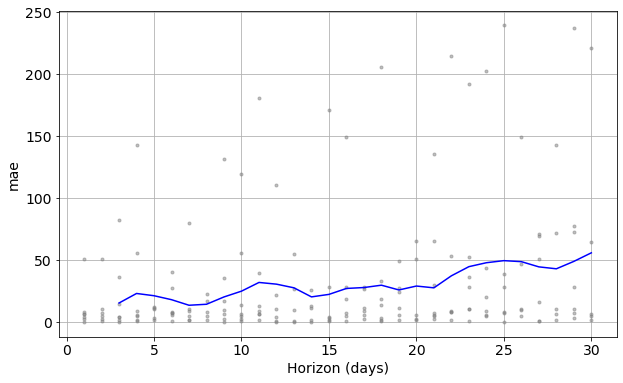

In [ ]:
plot_cross_validation_metric(df_cv, metric='mae'); #Média do erro absoluto

O resultado da MAE mostrou que a maioria dos pontos está próxima de zero, porém com alguns pontos dispersos.

**MAPE**

O MAPE não foi calculado pois os valores estavam próximos a 0

**MDAPE**

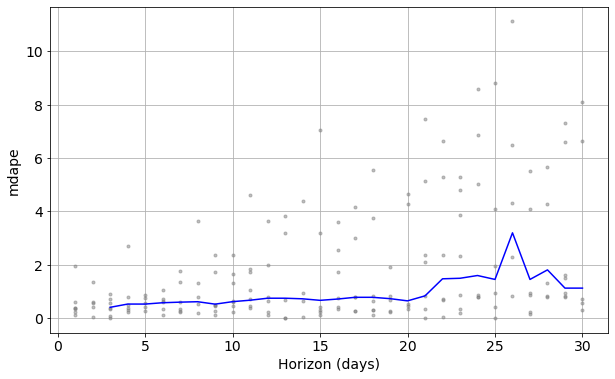

In [ ]:
plot_cross_validation_metric(df_cv, metric='mdape'); #Mediana do erro absoluto percentual

Nessa métrica a dispersão está mais alta de acordo com a quantidade de dias.

No geral, vemos que **quanto maior o número de dias**, **maior é a dispersão dos dados no nosso modelo**. Como esse projeto está usando dados reais da Pandemia de COVID-19, sabemos que em muitos momentos da pandemia os dados sofreram grandes mudanças, com picos de casos e óbitos e isso influencia nessa questão da dispersão dos pontos no modelo.
Contudo, na **previsão de Novos Óbitos** os **resultados** obtidos foram **melhores** no geral.

<a name="conc"></a>
#**Conclusões**


- As análises preliminares desse projeto mostraram que a **Pandemia de COVID-19 no Amazonas é, até o momento, caracterizada por dois picos**:  **a primeira onda começou em março de 2020 e atingiu o pico por volta do início de maio de 2020**, quando o número de casos diminuiu e então permaneceu praticamente estável de junho a novembro de 2020. Porém, **em meados de dezembro o número de casos começou a crescer exponencialmente, configurando a segunda onda da pandemia** 

- Os óbitos também tiveram a **primeira onda se iniciando em março de 2020, que atingiu o pico por volta do início de maio de 2020**, quando o número de óbitos diminuiu e então permaneceu praticamente estável de junho a novembro de 2020. Porém, **em meados de dezembro o número de óbitos começou a crescer exponencialmente, configurando a segunda onda**.

- Estudos acreditam que **o aumento de casos e óbitos foram impulsionados por uma combinação de diminuições das medidas de distanciamento social e pelo surgimento de uma forma mais transmissível do vírus, a variante P.1**, identificada em meados de novembro de 2020. **Essa variante causou um aumento exponencial da doença, o que estabeleceu a segunda onda da pandemia no estado**.

- Várias hipóteses foram propostas para explicar a segunda onda inesperada que resultou no colapso do sistema de saúde em Manaus entre dezembro de 2020 e janeiro de 2021 [[18]](https://www.thelancet.com/article/S0140-6736(21)00183-5/fulltext): Uma hipótese é que a **variante P.1 pode escapar da imunidade gerada em resposta a uma infecção anterior e tem o potencial de reinfectar indivíduos convalescentes**. Embora alguns casos de reinfecção com a variante P.1 tenham sido descritos em Manaus [[19]](https://science.sciencemag.org/content/372/6544/815), até que ponto as reinfecções efetivamente contribuem para a transmissão progressiva do SARS-CoV-2 e o aumento de casos na segunda onda no Amazonas permanece controverso. No entanto, várias **evidências complementares apoiam que esses eventos foram provavelmente motivados pelo surgimento de uma variante mais transmissível em um contexto de distanciamento social relaxado** [[14]](https://www.nature.com/articles/s41591-021-01378-7).

- Quando analisei as **médias móveis** de casos e óbitos, notei que houve uma **diminuição  e estabilização tanto para casos e óbitos, após abril de 2021**. O que, certamente, deve ser **reflexo da vacinação**, que foi iniciada em Janeiro de 2021 e segundo informações da secretaria municipal de saúde de Manaus em maio de 2021, mais de 250 mil pessoas já estavam com o ciclo de imunização completo em Manaus. Até o final de maio Manaus ultrapassou a meta de 90% estabelecida pelo Ministério da Saúde em dez grupos: povos indígenas; trabalhadores de saúde, pessoas de 60 a 64 anos; pessoas de 65 a 69%; grupo de 70 a 74 anos; de 75 a 79 anos; idosos de 80 anos e mais ; e pessoas de 18 a 59 anos com comorbidades.

**Relembrando as hipóteses que haviam sido definidas neste projeto:**


> Hipótese 1: O número de casos novos deve se estabilizar nos próximos meses, devido ao início da vacinação.

> Hipótese 2: O número de óbitos novos deve começar a cair nos próximos meses, devido ao início da vacinação.

- Após realizar as **previsões com o Prophet**, tanto para novos **casos** quanto para novos **óbitos**, consegui obter **modelos com curvas bem ajustadas e com dados de teste aderidos à curva**. Ambos **os modelos**,  **mostram uma tendência de queda para os próximos meses.**

- Portanto, **as duas hipóteses levantadas no início do projeto foram respondidas: Sim, após alguns meses de vacinação houve queda de casos e óbitos e a tendência é de que continuem diminuindo**.

- Quando testamos **previsões com períodos mais longos**, vemos que o **intervalo de confiança tende a aumentar cada vez mais**. No caso das previsões feitas neste projeto, **a curva de tendência indica que os números de novos casos e novos óbitos poderão se manter baixos nos próximos dois meses**. Porém, quando pensamos em séries temporais o esperado seria encontrar uma sazonalidade constante e não foi isso que vimos nestes dados de Manaus. **Em Manaus, observamos essa segunda onda catastrófica, que poderia ter sido evitada**, mas uma série de fatores [[11]](https://portal.fiocruz.br/sites/portal.fiocruz.br/files/documentos/boletim_covid_2021_extraordinario_junho_parte1.pdf) nos trouxeram essa triste realidade de vários óbitos causados pela COVID-19: 
  - Falha do governo em assumir a liderança e responsabilidade no desenvolvimento de estratégias coerentes destinadas à prevenção da transmissão do vírus; 
  - Descoordenação das políticas e ações entre os níveis nacional e estados/municípios, comprometendo as capacidades de mobilizar recursos essenciais para o enfrentamento da pandemia; 
  - Desvalorização de medidas preventivas e de tratamentos baseados na ciência e estímulo generalizado para a adoção de tratamentos sem comprovação científica;
  - Demora nas decisões e ações necessárias para garantia de estoque de insumos (equipamentos de UTI e proteção, medicamentos e vacinas); 
  - E é claro: a criação de um clima de descrédito e desconfiança na população em temas relacionados ao uso de máscaras e ao conjunto de medidas de distanciamento físico e social, bem como às vacinas, minando os esforços de enfrentamento e respostas.

- As análises de componentes, incluindo tendência, sazonalidade e feriados, mostraram que aos **domingos e segundas há uma diminuição da notificação dos casos e óbitos.** Esses dados da Pandemia aos domingos, segundas e feriados, costumam ser menores devido a atrasos de notificação nas secretarias da saúde, que nesses dias, trabalham com menos profissionais, em esquema de plantão. Além disso, podemos perceber que há uma **baixa nos casos e óbitos notificados, quando os dias úteis se tornam feriados.**

- O modelo de **sazonalidade multiplicativa**, que é usado com flutuações sazonais que variam dependendo do nível global da série, **se mostrou mais adequado para os modelos previstos neste projeto**. Destaque deve ser dados de novos Óbitos, onde nos valores das métricas do *Scikit-learn*, a média do erro absoluto foi de apenas 8.1, no caso da sazonalidade multiplicativa.
 
- Após realizar o *Cross-Validation* dos modelos de previsão, no geral, vemos que **quanto maior o número de dias do `horizon`, maior é a dispersão dos dados no nosso modelo**. Como esse projeto está usando dados reais da Pandemia de COVID-19, sabemos que em muitos momentos da pandemia os dados sofreram grandes mudanças, com picos de casos e óbitos e isso influencia nessa questão da dispersão dos pontos no modelo. Se fosse uma série temporal estabilizada, contendo dados de um tempo maior, possivelmente, os erros vistos nesses parâmetros poderiam ser bem menores do que estamos vendo aqui. Contudo, **na previsão de Novos Óbitos os resultados obtidos com essas métricas foram melhores no geral**.




<a name="final"></a>
# **Considerações finais**

Obtive os modelos deste projeto após:
- Criar uma lista com todos os feriados nacionais, estaduais (Amazonas) e do município Manaus;
- Remover os *outliers*;
- Então, fiz uma série de testes de como conseguir ajustar os dados e cheguei nos seguintes parâmetros finais:

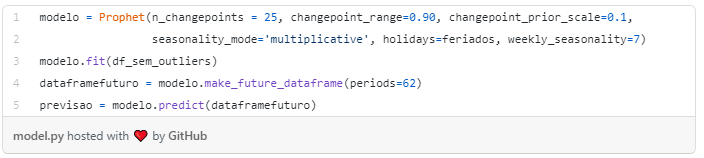

> Quando ajustei o modelo para Novos óbitos um `changepoint_range=0.92` me trouxe um melhor resultado. 

- `n_changepoints`: Este é o número de changepoints colocados automaticamente. O padrão de 25 deve ser suficiente para capturar as mudanças de tendência em uma série temporal típica. Em vez de aumentar ou diminuir o número de pontos de mudança, provavelmente será mais eficaz se concentrar em aumentar ou diminuir a flexibilidade nessas mudanças de tendência, o que é feito com `changepoint_prior_scale`. 

- `changepoint_range`: Esta é a proporção em que a tendência pode mudar. O *default* desse parâmetro é 0.8, (80%), o que significa que o modelo não se ajustará a nenhuma mudança de tendência nos últimos 20% da série temporal. Isso é bastante conservador, para evitar *overfitting* nas mudanças de tendência no final da série temporal, onde não há pista suficiente para se encaixar bem. Isso é algo que pode ser identificado visualmente com bastante facilidade: pode-se ver claramente se a previsão está indo mal nos últimos 20%. Porém, acabei ajustando para 0.90 (nos Novos Casos) e para 0.92 (nos Novos óbitos), pois devido ao pico de segunda onda da pandemia, a curva não estava se ajustando bem apenas com o valor *default* de 0.8. 

- `changepoint_prior_scale`: Este é provavelmente o parâmetro mais impactante. Ele determina a flexibilidade da tendência e, em particular, o quanto a tendência muda nos pontos de mudança de tendência. O *default* desse parâmetro é de 0.05 e isso funciona para muitas séries temporais, porém ajustei para 0.1.

- `seasonality_mode`: As opções são ['additive' ou 'multiplicative']. O *default* é 'aditivo', mas muitas séries temporais terão sazonalidade multiplicativa. Isso é melhor identificado apenas olhando para a série temporal e ver se a magnitude das flutuações sazonais cresce com a magnitude da série temporal. No meu caso, a sazonalidade multiplicativa gerou resultados melhores.

- `holidays`: para passar em um dataframe de feriados especificados.

- `weekly_seasonality`: 7 dias 


Após concluir as análises, vemos que em poucas linhas de código é possível fazer previsões e validações, o que faz do Prophet uma ferramenta bastante poderosa e prática. 








<a name="ref"></a>
#**Referências**

[[1]](https://www.nature.com/articles/s41579-018-0118-9) Origin and evolution of pathogenic coronaviruses. 
 
[[2]](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext) Nowcasting and forecasting the potential domestic and international spread of the 2019-nCoV outbreak originating in Wuhan, China: a modelling study.
 
[[3]](https://www.ufrgs.br/user/covid-19/) Universidade Federal do Rio Grande do Sul - Projeto: Use o R. 
 
[[4]](https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200304-sitrep-44-covid-19.pdf?sfvrsn=783b4c9d_2) World Health Organization - WHO. Coronavirus disease 2019 (COVID-19): situation report – 44.
 
[[5]](https://www.scielosp.org/article/ress/2020.v29n4/e2020376/) COVID-19 no Brasil: evolução da epidemia até a semana epidemiológica 20 de 2020. 
 
[[6]](https://brasil.elpais.com/ciencia/2020-07-23/evolucao-dos-casos-de-coronavirus-no-brasil.html) Evolução dos casos de coronavírus no Brasil. 
 
[[7]](https://www1.folha.uol.com.br/equilibrioesaude/2021/04/media-movel-de-mortes-passa-de-3000-e-brasil-registra-3673-obitos-em-24-h.shtml#:~:text=M%C3%A9dia%20m%C3%B3vel%20de%20mortes%20por,2021%20%2D%20Equil%C3%ADbrio%20e%20Sa%C3%BAde%20%2D%20Folha) Folha de São Paulo: Média móvel de mortes por Covid passa de 3.000 e Brasil registra 3.673 óbitos em 24h.
 
[[8]](https://covid.saude.gov.br/) Painel Coronavírus (acessado em 22/06/21).
 
[[9]](https://saude.estadao.com.br/noticias/geral,amazonas-apresenta-colapso-no-sistema-de-saude-por-causa-do-coronavirus,70003272136) Estadão: Amazonas apresenta colapso no sistema de saúde por causa do coronavírus. 
 
[[10]](https://www.cnnbrasil.com.br/saude/2021/03/17/covid-19-no-brasil-17-3-2021) CNN: Brasil bate recorde de casos de Covid-19 e média de mortes fica acima de 2.000.
 
[[11]](https://portal.fiocruz.br/sites/portal.fiocruz.br/files/documentos/boletim_covid_2021_extraordinario_junho_parte1.pdf) Boletim extraordinário do Observatório Covid-19 - 25 de junho - parte 1.
 
[[12]](https://www.scielo.br/j/mioc/a/zZcPQFjhhgYrJLVJ77HJC3C/?lang=en) Genomic and phylogenetic characterisation of an imported case of SARS-CoV-2 in Amazonas State, Brazil.
 
[[13]](https://www.fvs.am.gov.br/media/publicacao/21_02_21_BOLETIM_DIÁRIO_DE_CASOS_COVID-19.pdf) Fundação em Vigilância e Saúde do Amazonas. Boletim diários dos casos de COVID-19.
 
[[14]](https://www.nature.com/articles/s41591-021-01378-7) COVID-19 in Amazonas, Brazil, was driven by the persistence of endemic lineages and P.1 emergence.
 
[[15]](https://wwwnc.cdc.gov/eid/article/27/4/21-0138_article) Novel SARS-CoV-2 Variant in Travelers from Brazil to Japan.

[[16]](https://agenciabrasil.ebc.com.br/saude/noticia/2021-01/vacinacao-contra-covid-19-come%C3%A7a-em-todo-o-pais) Agência Brasil: Vacinação contra a covid-19 começa em todo o país
 
[[17]](https://semsa.manaus.am.gov.br/noticia/mais-de-250-mil-pessoas-ja-estao-com-o-ciclo-de-imunizacao-completo-em-manaus/) Imunização SEMSA - Manaus

[[18 ]](https://www.thelancet.com/article/S0140-6736(21)00183-5/fulltext) Resurgence of COVID-19 in Manaus, Brazil, despite high seroprevalence.

[[19]](https://science.sciencemag.org/content/372/6544/815) Genomics and epidemiology of the P.1 SARS-CoV-2 lineage in Manaus, Brazil.



<a name="doc"></a>
#**Documentação**

[Matplotlib](https://matplotlib.org/)
 
[Numpy](https://numpy.org/)
 
[Pandas](https://pandas.pydata.org/)
 
[Prophet](https://facebook.github.io/prophet/docs/quick_start.html)
 
[Scikit-learn](https://scikit-learn.org/)
 
[Seaborn](https://seaborn.pydata.org/)
 
[StatsModels](https://www.statsmodels.org/stable/index.html)


<a name="agra"></a>
#**Agradecimentos**


Gostaria de deixar meu agradecimento aos instrutores do módulo 3: Allan Spadini e Karoline Penteado. 
	
Ao pessoal do Scuba team e do Discord, que sempre trazem excelentes discussões e ideias.

Também gostaria de agradecer aos amigos Carolina Dias e Junior Torres, que sempre dão apoio, incentivo e fazem os dias serem mais leves e descontraídos. 


<p align="center"><img src=https://media.giphy.com/media/QSJflihoTLhXIzVjYU/giphy.gif </p> 



#**Onde encontrar meu trabalho?**

[Medium](https://valquiria-c-alencar.medium.com/)

[LinkedIn](https://www.linkedin.com/in/valquiria-alencar)
 
[ResearchGate](https://www.researchgate.net/profile/Valquiria-Alencar)
 
[Currículo lattes](http://lattes.cnpq.br/7742338443535710)